In [395]:
import pandas as pd
#import psycopg2
#import sql_functions as sf    #postgres SQL
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as stat
#import sqlalchemy
import chardet
import datetime as dt
import requests
from scipy.stats import ttest_ind
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [1]:
#import requests

url = "https://meteostat.p.rapidapi.com/point/monthly"

querystring = {"lat":"1.29027","lon":"103.851959","start":"1961-01-01","end":"2015-12-01"}

headers = {
	"x-rapidapi-key": "fec571117amshe8bc07b67dd0a44p1d445djsn00cdcce7c9da",
	"x-rapidapi-host": "meteostat.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

{'meta': {'generated': '2024-07-03 09:52:14', 'stations': ['48694', '48692', '48698', '96087']}, 'data': [{'date': '1961-01-01', 'tavg': 25.6, 'tmin': None, 'tmax': None, 'prcp': 150.0, 'wspd': None, 'pres': 1011.7, 'tsun': None}, {'date': '1961-02-01', 'tavg': 26.4, 'tmin': None, 'tmax': None, 'prcp': 130.0, 'wspd': None, 'pres': 1008.8, 'tsun': None}, {'date': '1961-03-01', 'tavg': 26.8, 'tmin': None, 'tmax': None, 'prcp': 300.0, 'wspd': None, 'pres': 1010.5, 'tsun': None}, {'date': '1961-04-01', 'tavg': 28.2, 'tmin': None, 'tmax': None, 'prcp': 140.0, 'wspd': None, 'pres': 1008.4, 'tsun': None}, {'date': '1961-05-01', 'tavg': 27.5, 'tmin': None, 'tmax': None, 'prcp': 140.0, 'wspd': None, 'pres': 1008.2, 'tsun': None}, {'date': '1961-06-01', 'tavg': 27.1, 'tmin': None, 'tmax': None, 'prcp': 120.0, 'wspd': None, 'pres': 1009.1, 'tsun': None}, {'date': '1961-07-01', 'tavg': 27.1, 'tmin': None, 'tmax': None, 'prcp': 120.0, 'wspd': None, 'pres': 1009.3, 'tsun': None}, {'date': '1961-08-0

In [13]:
weather_singap = response.json()

In [14]:
# Advanced flattening with json_normalize()
weather_singap_df = pd.json_normalize(weather_singap, 
                                  sep="_", 
                                  record_path="data")
                                  #meta=[["coord", "lon"], 
                                    #     ["coord", "lat"], 
                                    #     "base",
                                    #     ["main", "temp"],
                                    #     ["main", "feels_like"],
                                    #     ["main", "temp_min"],
                                    #     ["main", "temp_max"], 
                                    #     ["main", "pressure"], 
                                    #     ["main", "humidity"], 
                                    #     "visibility", 
                                    #     ["wind", "speed"], 
                                    #     ["wind", "deg"], 
                                    #     ["clouds", "all"], 
                                    #     "dt", 
                                    #     ["sys", "type"], 
                                    #     ["sys", "id"],
                                    #     ["sys", "country"],
                                    #     ["sys", "sunrise"],
                                    #     ["sys", "sunset"],
                                    #     "timezone",
                                    #     "id",
                                    #     "name",
                                    #     "cod"], 
                                  #record_prefix="weather_")
# Print weather_hh_df
print(weather_singap_df)

           date  tavg  tmin  tmax   prcp  wspd    pres  tsun
0    1961-01-01  25.6   NaN   NaN  150.0   NaN  1011.7   NaN
1    1961-02-01  26.4   NaN   NaN  130.0   NaN  1008.8   NaN
2    1961-03-01  26.8   NaN   NaN  300.0   NaN  1010.5   NaN
3    1961-04-01  28.2   NaN   NaN  140.0   NaN  1008.4   NaN
4    1961-05-01  27.5   NaN   NaN  140.0   NaN  1008.2   NaN
..          ...   ...   ...   ...    ...   ...     ...   ...
655  2015-08-01  28.5  25.8  31.2  188.2  11.9     NaN   NaN
656  2015-09-01  28.8  26.3  31.7   61.8  10.7     NaN   NaN
657  2015-10-01  28.7  26.1  32.2   87.3   9.4     NaN   NaN
658  2015-11-01  28.0  25.5  32.0   48.1   6.6     NaN   NaN
659  2015-12-01  27.8   NaN  31.4  314.5   NaN     NaN   NaN

[660 rows x 8 columns]


In [16]:
europe_arr_acc = pd.read_csv('data/tour_occ_arm_linear.csv')

In [17]:
europe_arr_acc

,DATAFLOW,LAST UPDATE,freq,c_resid,unit,nace_r2,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:TOUR_OCC_ARM(1.0),02/07/24 23:00:00,M,DOM,NR,I551,AL,2017-06,28833.00,e
1,ESTAT:TOUR_OCC_ARM(1.0),02/07/24 23:00:00,M,DOM,NR,I551,AL,2017-07,72723.00,e
2,ESTAT:TOUR_OCC_ARM(1.0),02/07/24 23:00:00,M,DOM,NR,I551,AL,2017-08,98635.00,e
3,ESTAT:TOUR_OCC_ARM(1.0),02/07/24 23:00:00,M,DOM,NR,I551,AL,2017-09,40580.00,e
4,ESTAT:TOUR_OCC_ARM(1.0),02/07/24 23:00:00,M,DOM,NR,I551,AL,2017-10,31474.00,e
...,...,...,...,...,...,...,...,...,...,...
259580,ESTAT:TOUR_OCC_ARM(1.0),02/07/24 23:00:00,M,TOTAL,PCH_SM_2Y,I553,AT,2010-04,36.57,NaN
259581,ESTAT:TOUR_OCC_ARM(1.0),02/07/24 23:00:00,M,TOTAL,PCH_SM_2Y,I553,AT,2010-05,-19.63,NaN
259582,ESTAT:TOUR_OCC_ARM(1.0),02/07/24 23:00:00,M,TOTAL,PCH_SM_2Y,I553,AT,2010-06,-17.36,NaN
259583,ESTAT:TOUR_OCC_ARM(1.0),02/07/24 23:00:00,M,TOTAL,PCH_SM_2Y,I553,AT,2010-08,-4.80,NaN


In [20]:
europe_prices = pd.read_csv('data/prc_hicp_midx_linear.csv')

In [21]:
europe_prices

,DATAFLOW,LAST UPDATE,freq,unit,coicop,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:PRC_HICP_MIDX(1.0),02/07/24 11:00:00,M,I05,CP00,AT,1996-01,86.68,NaN
1,ESTAT:PRC_HICP_MIDX(1.0),02/07/24 11:00:00,M,I05,CP00,AT,1996-02,86.94,NaN
2,ESTAT:PRC_HICP_MIDX(1.0),02/07/24 11:00:00,M,I05,CP00,AT,1996-03,87.20,NaN
3,ESTAT:PRC_HICP_MIDX(1.0),02/07/24 11:00:00,M,I05,CP00,AT,1996-04,87.11,NaN
4,ESTAT:PRC_HICP_MIDX(1.0),02/07/24 11:00:00,M,I05,CP00,AT,1996-05,87.03,NaN
...,...,...,...,...,...,...,...,...,...
7201327,ESTAT:PRC_HICP_MIDX(1.0),02/07/24 11:00:00,M,I96,TOT_X_TBC,UK,2020-07,151.90,NaN
7201328,ESTAT:PRC_HICP_MIDX(1.0),02/07/24 11:00:00,M,I96,TOT_X_TBC,UK,2020-08,151.20,NaN
7201329,ESTAT:PRC_HICP_MIDX(1.0),02/07/24 11:00:00,M,I96,TOT_X_TBC,UK,2020-09,151.80,NaN
7201330,ESTAT:PRC_HICP_MIDX(1.0),02/07/24 11:00:00,M,I96,TOT_X_TBC,UK,2020-10,151.90,NaN


In [24]:
airtraffic_us_sf = pd.read_csv('data/Air_Traffic_Passenger_Statistics_20240704.csv')

In [26]:
airtraffic_us_sf

,Activity Period,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,data_as_of,data_loaded_at
0,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,31432,2024/06/20 01:00:26 PM,2024/06/22 03:01:45 PM
1,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,31353,2024/06/20 01:00:26 PM,2024/06/22 03:01:45 PM
2,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,2518,2024/06/20 01:00:26 PM,2024/06/22 03:01:45 PM
3,199907,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Deplaned,Other,Terminal 2,D,1324,2024/06/20 01:00:26 PM,2024/06/22 03:01:45 PM
4,199907,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Enplaned,Other,Terminal 2,D,1198,2024/06/20 01:00:26 PM,2024/06/22 03:01:45 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35988,202404,2024/04/01,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Enplaned,Other,International,A,9973,2024/06/20 01:00:27 PM,2024/06/22 03:01:45 PM
35989,202404,2024/04/01,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Deplaned,Other,International,A,2860,2024/06/20 01:00:27 PM,2024/06/22 03:01:45 PM
35990,202404,2024/04/01,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Enplaned,Other,International,A,2787,2024/06/20 01:00:27 PM,2024/06/22 03:01:45 PM
35991,202404,2024/04/01,ZIPAIR Tokyo Inc,ZG,ZIPAIR Tokyo Inc,ZG,International,Asia,Deplaned,Other,International,A,7683,2024/06/20 01:00:27 PM,2024/06/22 03:01:45 PM


In [27]:
hotel_us_sf = pd.read_csv('data/Hotel_Occupancy_Rate.csv')

In [29]:
hotel_us_sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   category          11 non-null     object 
 1   indicator         11 non-null     object 
 2   sub_indicator     0 non-null      float64
 3   locality          11 non-null     object 
 4   gender            0 non-null      float64
 5   council_district  0 non-null      float64
 6   fiscal_year       0 non-null      float64
 7   fy_qtr            0 non-null      float64
 8   calendar_year     11 non-null     int64  
 9   cy_qtr            0 non-null      float64
 10  quarter_start     0 non-null      float64
 11  as_of_date        11 non-null     object 
 12  unit_of_measure   11 non-null     object 
 13  unit_text         0 non-null      float64
 14  value             11 non-null     float64
 15  source            11 non-null     object 
dtypes: float64(9), int64(1), object(6)
memory usag

In [122]:
neighbourhood_house_us = pd.read_csv('data/Seattle/Neighborhood_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')

In [123]:
neighbourhood_house_us

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31
0,112345,0,Maryvale,neighborhood,AZ,AZ,Phoenix,"Phoenix-Mesa-Chandler, AZ",Maricopa County,68480.722603,...,3.302797e+05,3.329863e+05,3.354548e+05,3.375472e+05,3.391495e+05,3.401860e+05,3.411732e+05,3.426699e+05,3.445194e+05,3.459643e+05
1,192689,1,Paradise,neighborhood,NV,NV,Las Vegas,"Las Vegas-Henderson-Paradise, NV",Clark County,136199.158545,...,3.731814e+05,3.761054e+05,3.786422e+05,3.808419e+05,3.829743e+05,3.849157e+05,3.867800e+05,3.886463e+05,3.911197e+05,3.938024e+05
2,270958,2,Upper West Side,neighborhood,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",New York County,395132.130028,...,1.273215e+06,1.263159e+06,1.252057e+06,1.240167e+06,1.232625e+06,1.227011e+06,1.220838e+06,1.215409e+06,1.213069e+06,1.210757e+06
3,270957,3,Upper East Side,neighborhood,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",New York County,633772.545159,...,1.235173e+06,1.230692e+06,1.222557e+06,1.211522e+06,1.201378e+06,1.194617e+06,1.188671e+06,1.184783e+06,1.182830e+06,1.179746e+06
4,118208,4,South Los Angeles,neighborhood,CA,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,134024.185778,...,6.722329e+05,6.824812e+05,6.911821e+05,6.979382e+05,7.023435e+05,7.000086e+05,6.933555e+05,6.864334e+05,6.838049e+05,6.837710e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21637,816177,27095,South Cameron Creek,neighborhood,CA,CA,Visalia,"Visalia, CA",Tulare County,NaN,...,3.910097e+05,3.925465e+05,3.933269e+05,3.928864e+05,3.924584e+05,3.926580e+05,3.939009e+05,3.955237e+05,3.971150e+05,3.987400e+05
21638,827535,27095,Grayhawk,neighborhood,TX,TX,Forney,"Dallas-Fort Worth-Arlington, TX",Kaufman County,NaN,...,5.076477e+05,5.071564e+05,5.059096e+05,5.033244e+05,5.014770e+05,4.994957e+05,4.981459e+05,4.976080e+05,4.980389e+05,4.979249e+05
21639,826363,27095,Windchase,neighborhood,TX,TX,Waxahachie,"Dallas-Fort Worth-Arlington, TX",Ellis County,NaN,...,3.293229e+05,3.292905e+05,3.289313e+05,3.282658e+05,3.272525e+05,3.266493e+05,3.267631e+05,3.279217e+05,3.288351e+05,3.287991e+05
21640,816529,27095,Cresta Gila Estates,neighborhood,AZ,AZ,Yuma,"Yuma, AZ",Yuma County,NaN,...,4.643889e+05,4.637876e+05,4.628548e+05,4.630201e+05,4.637246e+05,4.647936e+05,4.649155e+05,4.660115e+05,4.674529e+05,4.689924e+05


In [124]:
neighbourhood_house_seattl = neighbourhood_house_us[neighbourhood_house_us['City'] == 'Seattle']

In [125]:
neighbourhood_house_seattl

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31
293,250206,305,Capitol Hill,neighborhood,WA,WA,Seattle,"Seattle-Tacoma-Bellevue, WA",King County,2.810247e+05,...,6.807855e+05,6.806954e+05,6.812829e+05,6.805585e+05,6.788656e+05,6.774117e+05,6.766370e+05,6.777093e+05,6.783761e+05,6.781494e+05
386,272001,404,University District,neighborhood,WA,WA,Seattle,"Seattle-Tacoma-Bellevue, WA",King County,2.830483e+05,...,9.009763e+05,8.983230e+05,8.957598e+05,8.925170e+05,8.884310e+05,8.854414e+05,8.859196e+05,8.910085e+05,8.964288e+05,8.988960e+05
712,271990,743,Magnolia,neighborhood,WA,WA,Seattle,"Seattle-Tacoma-Bellevue, WA",King County,3.764331e+05,...,1.226638e+06,1.232150e+06,1.235415e+06,1.235857e+06,1.235449e+06,1.233553e+06,1.235737e+06,1.244114e+06,1.256864e+06,1.266570e+06
796,250788,834,Greenwood,neighborhood,WA,WA,Seattle,"Seattle-Tacoma-Bellevue, WA",King County,2.195883e+05,...,7.932938e+05,7.980691e+05,8.021029e+05,8.047862e+05,8.069403e+05,8.085233e+05,8.119452e+05,8.180684e+05,8.251770e+05,8.297761e+05
831,252248,870,Wallingford,neighborhood,WA,WA,Seattle,"Seattle-Tacoma-Bellevue, WA",King County,3.162662e+05,...,1.069705e+06,1.074940e+06,1.078961e+06,1.081453e+06,1.083262e+06,1.084665e+06,1.089173e+06,1.097971e+06,1.109162e+06,1.117847e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12137,250149,13666,Broadmoor,neighborhood,WA,WA,Seattle,"Seattle-Tacoma-Bellevue, WA",King County,1.292139e+06,...,3.435297e+06,3.452193e+06,3.460585e+06,3.462459e+06,3.449884e+06,3.432745e+06,3.422600e+06,3.434356e+06,3.462326e+06,3.487657e+06
12153,271804,13684,Atlantic,neighborhood,WA,WA,Seattle,"Seattle-Tacoma-Bellevue, WA",King County,1.986661e+05,...,8.024652e+05,8.027271e+05,8.024069e+05,8.016656e+05,8.016629e+05,8.016564e+05,8.030595e+05,8.060856e+05,8.095521e+05,8.113781e+05
13311,344016,15147,Jackson Place,neighborhood,WA,WA,Seattle,"Seattle-Tacoma-Bellevue, WA",King County,1.819988e+05,...,6.940490e+05,6.955665e+05,6.973712e+05,6.983398e+05,6.988606e+05,6.992526e+05,7.009127e+05,7.042739e+05,7.064384e+05,7.064466e+05
16320,344011,18964,Denny - Blaine,neighborhood,WA,WA,Seattle,"Seattle-Tacoma-Bellevue, WA",King County,8.772009e+05,...,2.311162e+06,2.315797e+06,2.313797e+06,2.307081e+06,2.299918e+06,2.294659e+06,2.294321e+06,2.307955e+06,2.331983e+06,2.356277e+06


In [126]:
neighbourhood_house_seattl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, 293 to 17375
Columns: 302 entries, RegionID to 2024-05-31
dtypes: float64(293), int64(2), object(7)
memory usage: 217.8+ KB


In [127]:
city_house_us = pd.read_csv('data/Seattle/City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')

In [128]:
city_house_us

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,235313.088433,236565.381466,...,738062.272500,735570.252401,732521.684206,729709.950477,728444.250269,728925.801336,730964.446315,735153.532350,739741.503943,742929.702420
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,226580.683895,226923.751717,...,941921.477318,957995.422141,971229.507276,980078.791081,984925.995744,981769.549983,974120.368938,967341.666629,965903.641720,967128.447080
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,102227.139184,102201.165955,...,267746.203638,268208.747215,268364.678187,268208.245790,268002.409957,268226.510654,268745.493181,269762.770095,270826.073709,271475.726378
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,144397.165602,144435.744175,...,289919.632420,291676.743978,292738.058977,293243.462313,293154.183560,293069.596590,293579.092262,295043.264047,297129.541288,298396.794323
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,99443.420882,99535.742667,...,266853.185591,266399.290443,265542.096920,264257.746326,262724.839077,261606.795816,261025.983119,261191.654604,261523.043779,261500.707778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21543,102287,30116,Kachemak City,city,AK,AK,NaN,Kenai Peninsula Borough,NaN,NaN,...,443708.047913,444044.207451,442910.981540,442198.082355,441643.511408,443015.468743,444664.659097,447729.863485,450256.015032,452869.497395
21544,47855,30116,Stirling City,city,CA,CA,"Chico, CA",Butte County,NaN,NaN,...,173259.089814,170880.929470,167642.931954,165344.490590,163119.090773,162636.445047,163302.185994,166456.580627,170601.186418,173981.825834
21545,39180,30116,Jumpertown,city,MS,MS,"Tupelo, MS",Prentiss County,NaN,NaN,...,130870.608046,130168.796519,129543.166552,128406.404633,127538.665416,126742.957562,126814.242832,127216.192386,128261.258685,129716.433210
21546,51728,30116,Dollar Bay,city,MI,MI,"Houghton, MI",Houghton County,NaN,NaN,...,140477.453804,141130.298071,141162.531527,140590.437221,139542.685241,138383.960453,137126.383820,137192.434594,138167.080084,139144.877474


In [129]:
city_house_seattl = city_house_us[city_house_us['RegionName'] == 'Seattle']

In [130]:
city_house_seattl

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31
24,16037,24,Seattle,city,WA,WA,"Seattle-Tacoma-Bellevue, WA",King County,266359.30062,267660.19092,...,856342.080902,860094.059502,863155.435258,864633.158764,865402.365999,865759.48529,868113.919882,873617.890602,880277.178829,884827.685172


In [83]:
median_earn_2021 = pd.read_csv('data/Seattle/B24021_median_earnings_occupation_5YALL_-688641291965021816.csv')

In [166]:
median_earn_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2276 entries, 0 to 2275
Data columns (total 82 columns):
 #   Column                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                         --------------  -----  
 0   OBJECTID                                                                                                                       2276 non-null   int64  
 1   GEOID                                                                                                                          2276 non-null   int64  
 2   Tract Name                                                                                                                     2276 non-null   object 
 3   Median Earnings of Total Full-Time Year-Round Civilian Employed Population 16 Years and Over with Earnings  

In [170]:
median_earn_2021.value_counts()

OBJECTID  GEOID        Tract Name                                    Median Earnings of Total Full-Time Year-Round Civilian Employed Population 16 Years and Over with Earnings  Median Earnings of Total Full-Time Year-Round Civilian Employed Population 16 Years and Over with Earnings - Margin of Error  Median Earnings of All Management, Business, Science, and Arts Occupations  Median Earnings of All Management, Business, Science, and Arts Occupations - Margin of Error  Median Earnings of All Management, Business, and Financial Occupations  Median Earnings of All Management, Business, and Financial Occupations - Margin of Error  Median Earnings of Management Occupations  Median Earnings of Management Occupations - Margin of Error  Median Earnings of Business and Financial Operations Occupations  Median Earnings of Business and Financial Operations Occupations - Margin of Error  Median Earnings of All Computer, Engineering, and Science Occupations  Median Earnings of All Computer, Enginee

In [220]:
crime_types_seattl = pd.read_csv('data/Seattle/SPD_Crime_Data__2008-Present_2024070(neighbourhood)4.csv')

In [221]:
crime_types_seattl

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,NaN,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/04/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118
2,2020-044465,12605567653,02/02/2020 08:30:00 PM,02/02/2020 09:30:00 PM,02/05/2020 09:39:33 AM,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384
3,2020-044225,12605174036,02/05/2020 01:17:00 AM,02/05/2020 02:21:00 AM,02/05/2020 03:30:55 AM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927
4,2020-044076,12605081469,02/05/2020 12:51:21 AM,NaN,02/05/2020 12:51:31 AM,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,N,B,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128967,2013-247888,7687554356,07/13/2013 01:00:00 AM,NaN,07/13/2013 06:37:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,SW,F,F1,PIGEON POINT,41XX BLOCK OF 20TH AVE SW,-122.359028,47.565702
1128968,2013-227022,7682354808,06/26/2013 11:00:00 AM,06/29/2013 06:30:00 AM,06/29/2013 09:43:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,W,Q,Q3,QUEEN ANNE,1ST AVE N / VALLEY ST,-122.355386,47.626251
1128969,2012-045494,7672915592,02/14/2012 03:04:00 PM,NaN,02/14/2012 03:04:00 PM,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,N,U,U1,ROOSEVELT/RAVENNA,73XX BLOCK OF ROOSEVELT WAY NE,-122.317464,47.681894
1128970,2010-328592,7692227482,09/19/2010 04:59:00 PM,NaN,09/19/2010 04:59:00 PM,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,W,M,M3,DOWNTOWN COMMERCIAL,5XX BLOCK OF PIKE ST,-122.335018,47.610909


In [6]:
crime_complains = pd.read_csv('data/Seattle/Code_Complaints_and_Violations_20240704.csv')

In [7]:
crime_complains

,RecordNum,RecordType,RecordTypeMapped,RecordTypeDesc,Description,OpenDate,LastInspDate,LastInspResult,StatusCurrent,OriginalAddress1,OriginalCity,OriginalState,OriginalZip,Link,Latitude,Longitude,Location1
0,001001-03CP,Complaint,Request,Construction,"Elevator gets stuck at least 3 times a week, f...",2003-11-10,POINT (-122.33582172 47.60642293),Completed,Completed,1100 2ND AVE,SEATTLE,WA,98101.0,https://cosaccela.seattle.gov/portal/customize...,47.606423,-122.335822,"(47.60642293, -122.33582172)"
1,001002-03CP,Complaint,Request,Construction,Concerned about RV pumpout that is currently b...,2003-11-10,POINT (-122.35191884 47.68639169),Completed,Completed,512 N 79TH ST,SEATTLE,WA,98103.0,https://cosaccela.seattle.gov/portal/customize...,47.686392,-122.351919,"(47.68639169, -122.35191884)"
2,001003-03CP,Complaint,Request,Vacant Building,The vacant red apple building and adjacent bui...,2003-11-10,POINT (-122.31388805 47.61559829),Completed,Completed,1400 E PINE ST,SEATTLE,WA,98122.0,https://cosaccela.seattle.gov/portal/customize...,47.615598,-122.313888,"(47.61559829, -122.31388805)"
3,001004-03CP,Complaint,Request,Land Use,Trailor and camper parked in back yard. Peopl...,2003-11-10,POINT (-122.36215164 47.69226044),Completed,Completed,332 NW 87TH ST,SEATTLE,WA,98117.0,https://cosaccela.seattle.gov/portal/customize...,47.692260,-122.362152,"(47.69226044, -122.36215164)"
4,001005-03CP,Complaint,Request,Land Use,"Illegal use of property.""Hawkers"" or vendors (...",2003-11-10,POINT (-122.33832038 47.60911773),Completed,Completed,1430 2ND AVE,SEATTLE,WA,98101.0,https://cosaccela.seattle.gov/portal/customize...,47.609118,-122.338320,"(47.60911773, -122.33832038)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207383,1058748-CT,Citation,Case,Land Use,"Parking in required yard, and more than 3 vehi...",2024-07-01,POINT (-122.36670799 47.72309019),Completed,Initiated,12757 8TH AVE NW,SEATTLE,WA,98177.0,https://cosaccela.seattle.gov/portal/customize...,47.723090,-122.366708,"(47.72309019, -122.36670799)"
207384,1058749-CT,Citation,Case,Weeds,Vegetation overgrowth,2024-07-01,POINT (-122.39734183 47.675704),Completed,Initiated,3037 NW 65TH ST,SEATTLE,WA,98117.0,https://cosaccela.seattle.gov/portal/customize...,47.675704,-122.397342,"(47.675704, -122.39734183)"
207385,1058750-CT,Citation,Case,Weeds,Vegetation overgrowth,2024-07-01,POINT (-122.35095943 47.6133206),Completed,Initiated,2501 ELLIOTT AVE,SEATTLE,WA,98121.0,https://cosaccela.seattle.gov/portal/customize...,47.613321,-122.350959,"(47.6133206, -122.35095943)"
207386,1058751-VI,Notice of Violation,Case,Land Use,Landscaping business has two LED lights at a 9...,2024-07-01,POINT (-122.34316696 47.61952018),Completed,Under Investigation,701 JOHN ST,SEATTLE,WA,98109.0,https://cosaccela.seattle.gov/portal/customize...,47.619520,-122.343167,"(47.61952018, -122.34316696)"


In [ ]:
seattle_zip_neighborhoods = {
    "98101": ["Downtown", "Belltown"],
    "98102": ["Eastlake", "Capitol Hill", "Portage Bay"],
    "98103": ["Wallingford", "Fremont", "Green Lake"],
    "98104": ["Pioneer Square", "International District"],
    "98105": ["University District", "Laurelhurst"],
    "98106": ["Delridge", "Riverview"],
    "98107": ["Ballard"],
    "98108": ["Georgetown", "South Park"],
    "98109": ["South Lake Union", "Queen Anne"],
    "98112": ["Madison Park", "Washington Park", "Denny-Blaine"],
    "98115": ["Wedgewood", "Roosevelt", "Ravenna"],
    "98116": ["West Seattle", "Admiral"],
    "98117": ["Ballard", "Crown Hill"],
    "98118": ["Rainier Valley", "Columbia City"],
    "98119": ["Queen Anne"],
    "98121": ["Belltown"],
    "98122": ["Central District", "Madrona"],
    "98125": ["Lake City", "Northgate"],
    "98126": ["West Seattle", "Delridge"],
    "98133": ["Bitter Lake", "Broadview"],
    "98134": ["SoDo"],
    "98136": ["West Seattle", "Fauntleroy"],
    "98144": ["Beacon Hill", "Mt. Baker"],
    "98146": ["White Center"],
    "98148": ["Burien", "Normandy Park"],
    "98154": ["Downtown"],
    "98155": ["Lake Forest Park"],
    "98164": ["Downtown"],
    "98168": ["Tukwila"],
    "98174": ["Downtown"],
    "98177": ["Broadview", "Blue Ridge"],
    "98178": ["Skyway"],
    "98188": ["Tukwila"],
    "98195": ["University of Washington"],
    "98199": ["Magnolia"]
}

In [ ]:
# merge housing seattle with crimes
# housing(Varitsara) with median earnings on GeoID

In [133]:
neighbourhood_house_seattl.head(1)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31
293,250206,305,Capitol Hill,neighborhood,WA,WA,Seattle,"Seattle-Tacoma-Bellevue, WA",King County,281024.676435,...,680785.501673,680695.414187,681282.935266,680558.472917,678865.587335,677411.674882,676636.958085,677709.308288,678376.070722,678149.357958


In [139]:
neighbourhood_house_seattl.rename(columns={'RegionName':'neighbourhood'}, inplace=True)

/var/folders/kt/c_d917yx6vs3yh3pfv_r5dyc0000gn/T/ipykernel_79406/889125219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbourhood_house_seattl.rename(columns={'RegionName':'neighbourhood'}, inplace=True)


In [140]:
neighbourhood_house_seattl.head(1)

,RegionID,SizeRank,neighbourhood,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31
293,250206,305,Capitol Hill,neighborhood,WA,WA,Seattle,"Seattle-Tacoma-Bellevue, WA",King County,281024.676435,...,680785.501673,680695.414187,681282.935266,680558.472917,678865.587335,677411.674882,676636.958085,677709.308288,678376.070722,678149.357958


In [141]:
neighbourhood_house_seattl['neighbourhood'] = neighbourhood_house_seattl['neighbourhood'].str.lower()

/var/folders/kt/c_d917yx6vs3yh3pfv_r5dyc0000gn/T/ipykernel_79406/3532412953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbourhood_house_seattl['neighbourhood'] = neighbourhood_house_seattl['neighbourhood'].str.lower()


In [143]:
neighbourhood_house_seattl.head(5)

,RegionID,SizeRank,neighbourhood,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31
293,250206,305,capitol hill,neighborhood,WA,WA,Seattle,"Seattle-Tacoma-Bellevue, WA",King County,281024.676435,...,6.807855e+05,6.806954e+05,6.812829e+05,6.805585e+05,6.788656e+05,6.774117e+05,6.766370e+05,6.777093e+05,6.783761e+05,6.781494e+05
386,272001,404,university district,neighborhood,WA,WA,Seattle,"Seattle-Tacoma-Bellevue, WA",King County,283048.262412,...,9.009763e+05,8.983230e+05,8.957598e+05,8.925170e+05,8.884310e+05,8.854414e+05,8.859196e+05,8.910085e+05,8.964288e+05,8.988960e+05
712,271990,743,magnolia,neighborhood,WA,WA,Seattle,"Seattle-Tacoma-Bellevue, WA",King County,376433.111250,...,1.226638e+06,1.232150e+06,1.235415e+06,1.235857e+06,1.235449e+06,1.233553e+06,1.235737e+06,1.244114e+06,1.256864e+06,1.266570e+06
796,250788,834,greenwood,neighborhood,WA,WA,Seattle,"Seattle-Tacoma-Bellevue, WA",King County,219588.304198,...,7.932938e+05,7.980691e+05,8.021029e+05,8.047862e+05,8.069403e+05,8.085233e+05,8.119452e+05,8.180684e+05,8.251770e+05,8.297761e+05
831,252248,870,wallingford,neighborhood,WA,WA,Seattle,"Seattle-Tacoma-Bellevue, WA",King County,316266.181858,...,1.069705e+06,1.074940e+06,1.078961e+06,1.081453e+06,1.083262e+06,1.084665e+06,1.089173e+06,1.097971e+06,1.109162e+06,1.117847e+06


In [154]:
len(neighbourhood_house_seattl['neighbourhood'].value_counts())

92

In [222]:
crime_types_seattl.head(1)

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,NaN,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387


In [223]:
crime_types_seattl.rename(columns={'MCPP':'neighbourhood'}, inplace=True)

In [224]:
crime_types_seattl.head(1)

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,neighbourhood,100 Block Address,Longitude,Latitude
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,NaN,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387


In [225]:
crime_types_seattl['neighbourhood'] = crime_types_seattl['neighbourhood'].str.lower()

In [226]:
crime_types_seattl.head()

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,neighbourhood,100 Block Address,Longitude,Latitude
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,NaN,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,magnolia,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/04/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,roosevelt/ravenna,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118
2,2020-044465,12605567653,02/02/2020 08:30:00 PM,02/02/2020 09:30:00 PM,02/05/2020 09:39:33 AM,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,roosevelt/ravenna,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384
3,2020-044225,12605174036,02/05/2020 01:17:00 AM,02/05/2020 02:21:00 AM,02/05/2020 03:30:55 AM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,magnolia,22XX BLOCK OF W RAYE ST,-122.384865,47.642927
4,2020-044076,12605081469,02/05/2020 12:51:21 AM,NaN,02/05/2020 12:51:31 AM,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,N,B,B2,ballard south,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193


In [227]:
len(crime_types_seattl['neighbourhood'].value_counts())

62

In [156]:
median_earn_2021.rename(columns={'Community Reporting Area Neighborhoods':'neighbourhood'}, inplace=True) #crime_types_seattl.rename(columns={'MCPP':'neighbourhood'}, inplace=True)

In [160]:
median_earn_2021['neighbourhood']=median_earn_2021['neighbourhood'].str.lower() #crime_types_seattl['neighbourhood'] = crime_types_seattl['neighbourhood'].str.lower()

In [184]:
median_earn_2021

,OBJECTID,GEOID,Tract Name,Median Earnings of Total Full-Time Year-Round Civilian Employed Population 16 Years and Over with Earnings,Median Earnings of Total Full-Time Year-Round Civilian Employed Population 16 Years and Over with Earnings - Margin of Error,"Median Earnings of All Management, Business, Science, and Arts Occupations","Median Earnings of All Management, Business, Science, and Arts Occupations - Margin of Error","Median Earnings of All Management, Business, and Financial Occupations","Median Earnings of All Management, Business, and Financial Occupations - Margin of Error",Median Earnings of Management Occupations,...,Median Earnings of Transportation Occupations - Margin of Error,Median Earnings of Material Moving Occupations,Median Earnings of Material Moving Occupations - Margin of Error,ACS Vintage,Jurisdiction,Community Reporting Area ID,Community Reporting Area Group,Community Reporting Area Name,neighbourhood,Tract Label
0,1,53033000300,Census Tract 3,64706,9257,81140.0,4789.0,74688.0,20678.0,101477.0,...,103046.0,NaN,NaN,5Y20,Seattle,9.5,9.0,Haller Lake,"haller lake, pinehurst",3.00
1,2,53033000402,Census Tract 4.02,75003,18638,99643.0,18801.0,112422.0,145382.0,177708.0,...,2084.0,40711.0,8680.0,5Y20,Seattle,9.1,9.0,Broadview/Bitter Lake,"broadview, bitter lake",4.02
2,3,53033000500,Census Tract 5,129485,14464,132258.0,10715.0,134706.0,16827.0,129583.0,...,NaN,NaN,NaN,5Y20,Seattle,9.1,9.0,Broadview/Bitter Lake,"broadview, bitter lake",5.00
3,4,53033000700,Census Tract 7,51330,14258,77839.0,18950.0,78776.0,49329.0,82321.0,...,11726.0,NaN,NaN,5Y20,Seattle,8.2,8.0,Olympic Hills/Victory Heights,"lake city, victory heights, olympic hills, pin...",7.00
4,5,53033000800,Census Tract 8,98676,10482,102279.0,13370.0,102353.0,14907.0,108542.0,...,NaN,NaN,NaN,5Y20,Seattle,8.3,8.0,Cedar Park/Meadowbrook,"cedar park, lake city, meadowbrook, matthews b...",8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2271,2272,53033032703,Census Tract 327.03; King County; Washington,72083,14459,102431.0,20591.0,143750.0,25704.0,148185.0,...,57748.0,42857.0,37923.0,5Y22,King County Balance,NaN,NaN,NaN,NaN,327.03
2272,2273,53033032704,Census Tract 327.04; King County; Washington,106748,6834,122885.0,24318.0,147308.0,39229.0,145568.0,...,0.0,0.0,0.0,5Y22,King County Balance,NaN,NaN,NaN,NaN,327.04
2273,2274,53033032705,Census Tract 327.05; King County; Washington,89583,28052,108975.0,21364.0,149653.0,37777.0,163071.0,...,0.0,0.0,0.0,5Y22,King County Balance,NaN,NaN,NaN,NaN,327.05
2274,2275,53033032706,Census Tract 327.06; King County; Washington,95714,18293,113409.0,3319.0,118614.0,14026.0,114420.0,...,20067.0,0.0,0.0,5Y22,King County Balance,NaN,NaN,NaN,NaN,327.06


In [162]:
median_earn_2021['neighbourhood']= median_earn_2021['neighbourhood'].str.split(', ')[1]

ValueError: Length of values (2) does not match length of index (2276)

In [ ]:
# census data with geoid and neighbourhoods

In [167]:
census = pd.read_csv('data/Seattle/2020_Census_Tracts_Seattle_-7486928068189135549.csv')

In [169]:
census[['GEOID20','Urban Village Demographic Area']]

,GEOID20,Urban Village Demographic Area
0,53033000402,Bitter Lake Village
1,53033000403,Bitter Lake Village
2,53033000700,Lake City
3,53033003302,Ballard
4,53033003601,Green Lake - Roosevelt
...,...,...
172,53033008101,Center City
173,53033010401,Othello
174,53033011401,Westwood-Highland Park
175,53033011700,Rainier Beach


In [171]:
city_house_seattl

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31
24,16037,24,Seattle,city,WA,WA,"Seattle-Tacoma-Bellevue, WA",King County,266359.30062,267660.19092,...,856342.080902,860094.059502,863155.435258,864633.158764,865402.365999,865759.48529,868113.919882,873617.890602,880277.178829,884827.685172


In [173]:
house_price = pd.read_csv('data/Seattle/Neighborhood_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')

In [174]:
house_price.head(1)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31
0,112345,0,Maryvale,neighborhood,AZ,AZ,Phoenix,"Phoenix-Mesa-Chandler, AZ",Maricopa County,68480.722603,...,330279.677519,332986.291547,335454.755843,337547.179717,339149.504357,340185.954642,341173.194065,342669.851589,344519.394807,345964.317041


In [176]:
house_price_seattl = house_price[house_price['City'] == 'Seattle']

In [177]:
house_price_seattl

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31
293,250206,305,Capitol Hill,neighborhood,WA,WA,Seattle,"Seattle-Tacoma-Bellevue, WA",King County,2.810247e+05,...,6.807855e+05,6.806954e+05,6.812829e+05,6.805585e+05,6.788656e+05,6.774117e+05,6.766370e+05,6.777093e+05,6.783761e+05,6.781494e+05
386,272001,404,University District,neighborhood,WA,WA,Seattle,"Seattle-Tacoma-Bellevue, WA",King County,2.830483e+05,...,9.009763e+05,8.983230e+05,8.957598e+05,8.925170e+05,8.884310e+05,8.854414e+05,8.859196e+05,8.910085e+05,8.964288e+05,8.988960e+05
712,271990,743,Magnolia,neighborhood,WA,WA,Seattle,"Seattle-Tacoma-Bellevue, WA",King County,3.764331e+05,...,1.226638e+06,1.232150e+06,1.235415e+06,1.235857e+06,1.235449e+06,1.233553e+06,1.235737e+06,1.244114e+06,1.256864e+06,1.266570e+06
796,250788,834,Greenwood,neighborhood,WA,WA,Seattle,"Seattle-Tacoma-Bellevue, WA",King County,2.195883e+05,...,7.932938e+05,7.980691e+05,8.021029e+05,8.047862e+05,8.069403e+05,8.085233e+05,8.119452e+05,8.180684e+05,8.251770e+05,8.297761e+05
831,252248,870,Wallingford,neighborhood,WA,WA,Seattle,"Seattle-Tacoma-Bellevue, WA",King County,3.162662e+05,...,1.069705e+06,1.074940e+06,1.078961e+06,1.081453e+06,1.083262e+06,1.084665e+06,1.089173e+06,1.097971e+06,1.109162e+06,1.117847e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12137,250149,13666,Broadmoor,neighborhood,WA,WA,Seattle,"Seattle-Tacoma-Bellevue, WA",King County,1.292139e+06,...,3.435297e+06,3.452193e+06,3.460585e+06,3.462459e+06,3.449884e+06,3.432745e+06,3.422600e+06,3.434356e+06,3.462326e+06,3.487657e+06
12153,271804,13684,Atlantic,neighborhood,WA,WA,Seattle,"Seattle-Tacoma-Bellevue, WA",King County,1.986661e+05,...,8.024652e+05,8.027271e+05,8.024069e+05,8.016656e+05,8.016629e+05,8.016564e+05,8.030595e+05,8.060856e+05,8.095521e+05,8.113781e+05
13311,344016,15147,Jackson Place,neighborhood,WA,WA,Seattle,"Seattle-Tacoma-Bellevue, WA",King County,1.819988e+05,...,6.940490e+05,6.955665e+05,6.973712e+05,6.983398e+05,6.988606e+05,6.992526e+05,7.009127e+05,7.042739e+05,7.064384e+05,7.064466e+05
16320,344011,18964,Denny - Blaine,neighborhood,WA,WA,Seattle,"Seattle-Tacoma-Bellevue, WA",King County,8.772009e+05,...,2.311162e+06,2.315797e+06,2.313797e+06,2.307081e+06,2.299918e+06,2.294659e+06,2.294321e+06,2.307955e+06,2.331983e+06,2.356277e+06


In [178]:
house_price_seattl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, 293 to 17375
Columns: 302 entries, RegionID to 2024-05-31
dtypes: float64(293), int64(2), object(7)
memory usage: 217.8+ KB


In [181]:
house_price_seattl1 = house_price_seattl.transpose()

In [182]:
house_price_seattl1

,293,386,712,796,831,1067,1157,1241,1242,1243,...,9820,9870,10025,10327,10587,12137,12153,13311,16320,17375
RegionID,250206,272001,271990,250788,252248,250692,271921,271869,251709,250017,...,344018,251186,272026,250714,271964,250149,271804,344016,344011,271963
SizeRank,305,404,743,834,870,1114,1207,1291,1293,1294,...,10770,10829,11018,11406,11731,13666,13684,15147,18964,20296
RegionName,Capitol Hill,University District,Magnolia,Greenwood,Wallingford,Fremont,Minor,First Hill,Ravenna,Adams,...,Waterfront,Madison Park,Windermere,Georgetown,Portage Bay,Broadmoor,Atlantic,Jackson Place,Denny - Blaine,Pioneer Square
RegionType,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,...,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood
StateName,WA,WA,WA,WA,WA,WA,WA,WA,WA,WA,...,WA,WA,WA,WA,WA,WA,WA,WA,WA,WA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-31,677411.674882,885441.357422,1233553.443506,808523.312134,1084665.193096,888116.955461,844210.027961,448994.651752,1093856.33999,772139.707703,...,710851.020323,1672092.533968,1804047.314015,673856.385298,1376556.74403,3432744.595285,801656.418435,699252.580958,2294659.250073,637416.951305
2024-02-29,676636.958085,885919.586771,1235736.676116,811945.187864,1089173.300131,891972.119223,847553.546462,448477.085294,1096044.378634,774187.331602,...,711581.083318,1671445.680348,1796512.611029,675285.809964,1381209.115056,3422599.931409,803059.547555,700912.704681,2294321.377405,635974.469948
2024-03-31,677709.308288,891008.481817,1244113.670498,818068.417183,1097970.705941,898122.411147,852865.946449,449068.184908,1102042.806721,779064.143539,...,714469.744476,1679835.792782,1796335.510678,678318.245138,1389449.551454,3434355.50095,806085.570171,704273.861141,2307954.550867,635472.663148
2024-04-30,678376.070722,896428.753764,1256864.083398,825177.026792,1109162.130131,904728.009974,856948.379767,449200.441689,1111449.222567,783712.485152,...,716057.160546,1694997.983877,1807160.243705,680527.386215,1398810.676007,3462326.340826,809552.132426,706438.406295,2331983.158978,634886.372632


In [183]:
house_price_seattl

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31
293,250206,305,Capitol Hill,neighborhood,WA,WA,Seattle,"Seattle-Tacoma-Bellevue, WA",King County,2.810247e+05,...,6.807855e+05,6.806954e+05,6.812829e+05,6.805585e+05,6.788656e+05,6.774117e+05,6.766370e+05,6.777093e+05,6.783761e+05,6.781494e+05
386,272001,404,University District,neighborhood,WA,WA,Seattle,"Seattle-Tacoma-Bellevue, WA",King County,2.830483e+05,...,9.009763e+05,8.983230e+05,8.957598e+05,8.925170e+05,8.884310e+05,8.854414e+05,8.859196e+05,8.910085e+05,8.964288e+05,8.988960e+05
712,271990,743,Magnolia,neighborhood,WA,WA,Seattle,"Seattle-Tacoma-Bellevue, WA",King County,3.764331e+05,...,1.226638e+06,1.232150e+06,1.235415e+06,1.235857e+06,1.235449e+06,1.233553e+06,1.235737e+06,1.244114e+06,1.256864e+06,1.266570e+06
796,250788,834,Greenwood,neighborhood,WA,WA,Seattle,"Seattle-Tacoma-Bellevue, WA",King County,2.195883e+05,...,7.932938e+05,7.980691e+05,8.021029e+05,8.047862e+05,8.069403e+05,8.085233e+05,8.119452e+05,8.180684e+05,8.251770e+05,8.297761e+05
831,252248,870,Wallingford,neighborhood,WA,WA,Seattle,"Seattle-Tacoma-Bellevue, WA",King County,3.162662e+05,...,1.069705e+06,1.074940e+06,1.078961e+06,1.081453e+06,1.083262e+06,1.084665e+06,1.089173e+06,1.097971e+06,1.109162e+06,1.117847e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12137,250149,13666,Broadmoor,neighborhood,WA,WA,Seattle,"Seattle-Tacoma-Bellevue, WA",King County,1.292139e+06,...,3.435297e+06,3.452193e+06,3.460585e+06,3.462459e+06,3.449884e+06,3.432745e+06,3.422600e+06,3.434356e+06,3.462326e+06,3.487657e+06
12153,271804,13684,Atlantic,neighborhood,WA,WA,Seattle,"Seattle-Tacoma-Bellevue, WA",King County,1.986661e+05,...,8.024652e+05,8.027271e+05,8.024069e+05,8.016656e+05,8.016629e+05,8.016564e+05,8.030595e+05,8.060856e+05,8.095521e+05,8.113781e+05
13311,344016,15147,Jackson Place,neighborhood,WA,WA,Seattle,"Seattle-Tacoma-Bellevue, WA",King County,1.819988e+05,...,6.940490e+05,6.955665e+05,6.973712e+05,6.983398e+05,6.988606e+05,6.992526e+05,7.009127e+05,7.042739e+05,7.064384e+05,7.064466e+05
16320,344011,18964,Denny - Blaine,neighborhood,WA,WA,Seattle,"Seattle-Tacoma-Bellevue, WA",King County,8.772009e+05,...,2.311162e+06,2.315797e+06,2.313797e+06,2.307081e+06,2.299918e+06,2.294659e+06,2.294321e+06,2.307955e+06,2.331983e+06,2.356277e+06


In [185]:
house_price_seattl1.head(1)

,293,386,712,796,831,1067,1157,1241,1242,1243,...,9820,9870,10025,10327,10587,12137,12153,13311,16320,17375
RegionID,250206,272001,271990,250788,252248,250692,271921,271869,251709,250017,...,344018,251186,272026,250714,271964,250149,271804,344016,344011,271963


In [192]:
#header = df[df['old_header_name1'] == 'new_header_name1']
#df.columns = header

# header = house_price_seattl['RegionName']
# house_price_seattl.columns = header

house_price_seattl_tr =  house_price_seattl.set_index('RegionName').transpose()

In [193]:
house_price_seattl_tr

RegionName,Capitol Hill,University District,Magnolia,Greenwood,Wallingford,Fremont,Minor,First Hill,Ravenna,Adams,...,Waterfront,Madison Park,Windermere,Georgetown,Portage Bay,Broadmoor,Atlantic,Jackson Place,Denny - Blaine,Pioneer Square
RegionID,250206,272001,271990,250788,252248,250692,271921,271869,251709,250017,...,344018,251186,272026,250714,271964,250149,271804,344016,344011,271963
SizeRank,305,404,743,834,870,1114,1207,1291,1293,1294,...,10770,10829,11018,11406,11731,13666,13684,15147,18964,20296
RegionType,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,...,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood
StateName,WA,WA,WA,WA,WA,WA,WA,WA,WA,WA,...,WA,WA,WA,WA,WA,WA,WA,WA,WA,WA
State,WA,WA,WA,WA,WA,WA,WA,WA,WA,WA,...,WA,WA,WA,WA,WA,WA,WA,WA,WA,WA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-31,677411.674882,885441.357422,1233553.443506,808523.312134,1084665.193096,888116.955461,844210.027961,448994.651752,1093856.33999,772139.707703,...,710851.020323,1672092.533968,1804047.314015,673856.385298,1376556.74403,3432744.595285,801656.418435,699252.580958,2294659.250073,637416.951305
2024-02-29,676636.958085,885919.586771,1235736.676116,811945.187864,1089173.300131,891972.119223,847553.546462,448477.085294,1096044.378634,774187.331602,...,711581.083318,1671445.680348,1796512.611029,675285.809964,1381209.115056,3422599.931409,803059.547555,700912.704681,2294321.377405,635974.469948
2024-03-31,677709.308288,891008.481817,1244113.670498,818068.417183,1097970.705941,898122.411147,852865.946449,449068.184908,1102042.806721,779064.143539,...,714469.744476,1679835.792782,1796335.510678,678318.245138,1389449.551454,3434355.50095,806085.570171,704273.861141,2307954.550867,635472.663148
2024-04-30,678376.070722,896428.753764,1256864.083398,825177.026792,1109162.130131,904728.009974,856948.379767,449200.441689,1111449.222567,783712.485152,...,716057.160546,1694997.983877,1807160.243705,680527.386215,1398810.676007,3462326.340826,809552.132426,706438.406295,2331983.158978,634886.372632


In [201]:
house_price_seattl_tr_drop = house_price_seattl_tr.drop(['RegionID', 'SizeRank', 'RegionType', 'StateName','State','City','Metro','CountyName'])

In [202]:
house_price_seattl_tr_drop  #reset index and rename

#slice the data frame, wrtie a for loop  (use .melt?)

RegionName,Capitol Hill,University District,Magnolia,Greenwood,Wallingford,Fremont,Minor,First Hill,Ravenna,Adams,...,Waterfront,Madison Park,Windermere,Georgetown,Portage Bay,Broadmoor,Atlantic,Jackson Place,Denny - Blaine,Pioneer Square
2000-01-31,281024.676435,283048.262412,376433.11125,219588.304198,316266.181858,262317.006278,238988.464119,202845.708351,324161.08552,225165.94806,...,NaN,579758.128846,568857.75599,180631.419555,462931.692071,1292139.31235,198666.060499,181998.787638,877200.861998,357930.046974
2000-02-29,282494.546819,284725.612733,378666.789158,220547.472045,318546.428733,264294.200525,240790.220585,204091.836689,325669.64109,225866.282248,...,NaN,583608.394932,572806.571431,182225.484454,466781.469808,1306501.220991,199812.160405,183886.035975,882068.545643,360551.550858
2000-03-31,284117.452564,286260.603683,380567.950384,221571.162257,320829.036429,266199.411695,242902.757857,205544.427521,326965.356596,226577.651581,...,NaN,587325.719332,576039.824671,183479.711841,470102.839132,1319568.744581,201897.943902,185875.962908,886697.157354,363139.594762
2000-04-30,287428.374093,289204.519627,384439.761217,223970.797855,324724.560336,269683.16265,246369.724291,208757.859034,329700.245624,228244.019844,...,NaN,593588.693366,581857.813805,186034.408152,476266.02338,1344369.437863,205490.879703,188937.621754,893093.232752,368091.242834
2000-05-31,291575.897613,292260.186132,388826.532153,226734.688851,328811.270923,272929.726959,249693.622281,212168.409434,332282.921637,230759.984811,...,NaN,600084.573399,587368.134446,188174.066708,483097.962886,1367615.777199,209510.674885,191890.227315,900710.700641,372420.601261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-31,677411.674882,885441.357422,1233553.443506,808523.312134,1084665.193096,888116.955461,844210.027961,448994.651752,1093856.33999,772139.707703,...,710851.020323,1672092.533968,1804047.314015,673856.385298,1376556.74403,3432744.595285,801656.418435,699252.580958,2294659.250073,637416.951305
2024-02-29,676636.958085,885919.586771,1235736.676116,811945.187864,1089173.300131,891972.119223,847553.546462,448477.085294,1096044.378634,774187.331602,...,711581.083318,1671445.680348,1796512.611029,675285.809964,1381209.115056,3422599.931409,803059.547555,700912.704681,2294321.377405,635974.469948
2024-03-31,677709.308288,891008.481817,1244113.670498,818068.417183,1097970.705941,898122.411147,852865.946449,449068.184908,1102042.806721,779064.143539,...,714469.744476,1679835.792782,1796335.510678,678318.245138,1389449.551454,3434355.50095,806085.570171,704273.861141,2307954.550867,635472.663148
2024-04-30,678376.070722,896428.753764,1256864.083398,825177.026792,1109162.130131,904728.009974,856948.379767,449200.441689,1111449.222567,783712.485152,...,716057.160546,1694997.983877,1807160.243705,680527.386215,1398810.676007,3462326.340826,809552.132426,706438.406295,2331983.158978,634886.372632


In [220]:
house_price_seattl_tr_drop.reset_index(inplace=True)

In [222]:
house_price_seattl_tr_drop.head(1)

RegionName,index,Capitol Hill,University District,Magnolia,Greenwood,Wallingford,Fremont,Minor,First Hill,Ravenna,...,Waterfront,Madison Park,Windermere,Georgetown,Portage Bay,Broadmoor,Atlantic,Jackson Place,Denny - Blaine,Pioneer Square
0,2000-01-31,281024.676435,283048.262412,376433.11125,219588.304198,316266.181858,262317.006278,238988.464119,202845.708351,324161.08552,...,NaN,579758.128846,568857.75599,180631.419555,462931.692071,1292139.31235,198666.060499,181998.787638,877200.861998,357930.046974


In [225]:
print(house_price_seattl_tr_drop.columns.to_list())

['index', 'Capitol Hill', 'University District', 'Magnolia', 'Greenwood', 'Wallingford', 'Fremont', 'Minor', 'First Hill', 'Ravenna', 'Adams', 'North Beacon Hill', 'Belltown', 'Maple Leaf', 'Admiral', 'Beacon Hill', 'Lower Queen Anne', 'North Queen Anne', 'Phinney Ridge', 'Green Lake', 'Columbia City', 'Loyal Heights', 'Bitter Lake', 'South Lake Union', 'Denny Triangle', 'Olympic Hills', 'Haller Lake', 'Brighton', 'High Point', 'Broadview', 'West Woodland', 'Downtown', 'Genesee', 'East Queen Anne', 'Wedgwood', 'West Queen Anne', 'North College Park', 'Gatewood', 'Rainier Beach', 'Pinehurst', 'Fairmount Park', 'South Delridge', 'Highland Park', 'Mt. Baker', 'Matthews Beach', 'Whittier Heights', 'Cedar Park', 'Victory Heights', 'Roosevelt', 'Seaview', 'Roxhill', 'North Beach', 'South Beacon Hill', 'Dunlap', 'Crown Hill', 'Bryant', 'Westlake', 'Arbor Heights', 'Alki', 'Madison Valley', 'Sunset Hill', 'Mann', 'Fauntleroy', 'Madrona', 'Meadowbrook', 'International District', 'View Ridge', '

In [230]:
house_price_seattl_tr_drop_melt = pd.melt(house_price_seattl_tr_drop,                                        # dataset
                        id_vars=['index'],      # Column(s) to use as identifier variables
                        value_vars=['Capitol Hill', 'University District', 'Magnolia', 'Greenwood', 'Wallingford', 'Fremont', 'Minor', 'First Hill', 'Ravenna', 'Adams', 'North Beacon Hill', 'Belltown', 'Maple Leaf', 'Admiral', 'Beacon Hill', 'Lower Queen Anne', 'North Queen Anne', 'Phinney Ridge', 'Green Lake', 'Columbia City', 'Loyal Heights', 'Bitter Lake', 'South Lake Union', 'Denny Triangle', 'Olympic Hills', 'Haller Lake', 'Brighton', 'High Point', 'Broadview', 'West Woodland', 'Downtown', 'Genesee', 'East Queen Anne', 'Wedgwood', 'West Queen Anne', 'North College Park', 'Gatewood', 'Rainier Beach', 'Pinehurst', 'Fairmount Park', 'South Delridge', 'Highland Park', 'Mt. Baker', 'Matthews Beach', 'Whittier Heights', 'Cedar Park', 'Victory Heights', 'Roosevelt', 'Seaview', 'Roxhill', 'North Beach', 'South Beacon Hill', 'Dunlap', 'Crown Hill', 'Bryant', 'Westlake', 'Arbor Heights', 'Alki', 'Madison Valley', 'Sunset Hill', 'Mann', 'Fauntleroy', 'Madrona', 'Meadowbrook', 'International District', 'View Ridge', 'Northgate', 'Holly Park', 'Hillman City', 'Judkins Park', 'Leschi', 'North Delridge', 'South Park', 'Montlake', 'Interbay', 'Riverview', 'Rainier View', 'Laurelhurst', 'Eastlake', 'Lakewood', 'Seward Park', 'Hawthorne Hills', 'Waterfront', 'Madison Park', 'Windermere', 'Georgetown', 'Portage Bay', 'Broadmoor', 'Atlantic', 'Jackson Place', 'Denny - Blaine', 'Pioneer Square'],  # Column(s) to unpivot
                        var_name='neighbourhood',                     # Name to use for the ‘variable’ column
                        value_name='price')                              # Name to use for the ‘value’ column

In [ ]:
# Melt the DataFrame
#df_melted = df.melt(id_vars=[‘date’], var_name=‘regionname’, value_name=‘pricing’)
# Display the resulting DataFrame
#print(df_melted.head())

In [231]:
house_price_seattl_tr_drop_melt

,index,neighbourhood,price
0,2000-01-31,Capitol Hill,281024.676435
1,2000-02-29,Capitol Hill,282494.546819
2,2000-03-31,Capitol Hill,284117.452564
3,2000-04-30,Capitol Hill,287428.374093
4,2000-05-31,Capitol Hill,291575.897613
...,...,...,...
26951,2024-01-31,Pioneer Square,637416.951305
26952,2024-02-29,Pioneer Square,635974.469948
26953,2024-03-31,Pioneer Square,635472.663148
26954,2024-04-30,Pioneer Square,634886.372632


In [234]:
house_price_seattl_tr_drop_melt['neighbourhood']=house_price_seattl_tr_drop_melt['neighbourhood'].str.lower().str.strip()

In [240]:
house_price_seattl_tr_drop_melt.rename(columns={'index':'date'}, inplace=True)

In [262]:
house_price_seattl_tr_drop_melt['date'] = pd.to_datetime(house_price_seattl_tr_drop_melt['date'])

In [263]:
house_price_seattl_tr_drop_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26956 entries, 0 to 26955
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           26956 non-null  datetime64[ns]
 1   neighbourhood  26956 non-null  object        
 2   price          26535 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 631.9+ KB


In [264]:
house_price_seattl_tr_drop_melt

,date,neighbourhood,price
0,2000-01-31,capitol hill,281024.676435
1,2000-02-29,capitol hill,282494.546819
2,2000-03-31,capitol hill,284117.452564
3,2000-04-30,capitol hill,287428.374093
4,2000-05-31,capitol hill,291575.897613
...,...,...,...
26951,2024-01-31,pioneer square,637416.951305
26952,2024-02-29,pioneer square,635974.469948
26953,2024-03-31,pioneer square,635472.663148
26954,2024-04-30,pioneer square,634886.372632


In [306]:
print(house_price_seattl_tr_drop_melt.neighbourhood.unique())
#print(sorted(house_price_seattl_tr_drop_melt.neighbourhood.unique()))
#print(house_price_seattl_tr_drop_melt.neighbourhood.value_counts())
#len(house_price_seattl_tr_drop_melt.neighbourhood.unique())  92 unique values

['capitol hill' 'university district' 'magnolia' 'greenwood' 'wallingford'
 'fremont' 'minor' 'first hill' 'ravenna' 'adams' 'north beacon hill'
 'belltown' 'maple leaf' 'admiral' 'beacon hill' 'lower queen anne'
 'north queen anne' 'phinney ridge' 'green lake' 'columbia city'
 'loyal heights' 'bitter lake' 'south lake union' 'denny triangle'
 'olympic hills' 'haller lake' 'brighton' 'high point' 'broadview'
 'west woodland' 'downtown' 'genesee' 'east queen anne' 'wedgwood'
 'west queen anne' 'north college park' 'gatewood' 'rainier beach'
 'pinehurst' 'fairmount park' 'south delridge' 'highland park' 'mt. baker'
 'matthews beach' 'whittier heights' 'cedar park' 'victory heights'
 'roosevelt' 'seaview' 'roxhill' 'north beach' 'south beacon hill'
 'dunlap' 'crown hill' 'bryant' 'westlake' 'arbor heights' 'alki'
 'madison valley' 'sunset hill' 'mann' 'fauntleroy' 'madrona'
 'meadowbrook' 'international district' 'view ridge' 'northgate'
 'holly park' 'hillman city' 'judkins park' 'leschi

In [228]:
crime_types_seattl.head(2)

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,neighbourhood,100 Block Address,Longitude,Latitude
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,NaN,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,magnolia,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/04/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,roosevelt/ravenna,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118


In [229]:
crime_types_seattl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128972 entries, 0 to 1128971
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Report Number           1128972 non-null  object 
 1   Offense ID              1128972 non-null  int64  
 2   Offense Start DateTime  1127162 non-null  object 
 3   Offense End DateTime    647977 non-null   object 
 4   Report DateTime         1128972 non-null  object 
 5   Group A B               1128972 non-null  object 
 6   Crime Against Category  1128972 non-null  object 
 7   Offense Parent Group    1128972 non-null  object 
 8   Offense                 1128972 non-null  object 
 9   Offense Code            1128972 non-null  object 
 10  Precinct                1128965 non-null  object 
 11  Sector                  1128965 non-null  object 
 12  Beat                    1128965 non-null  object 
 13  neighbourhood           1128945 non-null  object 
 14  10

In [230]:
print(crime_types_seattl.neighbourhood.unique())
#print(crime_types_seattl.neighbourhood.value_counts())
#len(crime_types_seattl.neighbourhood.unique())  #63 unique values

['magnolia' 'roosevelt/ravenna' 'ballard south' 'downtown commercial'
 'phinney ridge' 'roxhill/westwood/arbor heights' 'northgate'
 'capitol hill' 'university' 'columbia city' 'north beacon hill'
 'first hill' 'georgetown' 'queen anne' 'sodo' 'central area/squire park'
 'mid beacon hill' 'alaska junction' 'fremont' 'north admiral'
 'slu/cascade' 'chinatown/international district' 'sandpoint'
 'hillman city' 'high point' 'mount baker' 'highland park' 'bitterlake'
 'belltown' 'pioneer square' 'judkins park/north beacon hill'
 'madrona/leschi' 'madison park' 'north delridge'
 'claremont/rainier vista' 'rainier view' 'montlake/portage bay'
 'lakewood/seward park' 'south delridge' 'wallingford' 'south beacon hill'
 'new holly' 'greenwood' 'ballard north' 'pigeon point' 'morgan'
 'brighton/dunlap' 'miller park' 'eastlake - west' 'rainier beach'
 'south park' 'alki' 'fauntleroy sw' 'genesee' 'commercial harbor island'
 'eastlake - east' 'commercial duwamish' 'unknown' 'lakecity' '<null>' nan

In [233]:
#len(crime_types_seattl.neighbourhood)  #All rows are 1128972
#crime_types_seattl.neighbourhood.count()   #not null values rows are 1128945
crime_types_seattl.neighbourhood.isnull().value_counts() #null values are 27

neighbourhood
False    1128945
True          27
Name: count, dtype: int64

In [18]:
#df2.col.isin(df1.col)
house_price_seattl_tr_drop_melt.neighbourhood.isin(crime_types_seattl.neighbourhood).value_counts()

NameError: name 'house_price_seattl_tr_drop_melt' is not defined

In [15]:
crime_types_seattl.neighbourhood.isin(house_price_seattl_tr_drop_melt.neighbourhood).value_counts()

NameError: name 'house_price_seattl_tr_drop_melt' is not defined

# Second housing data set

In [207]:
housing_data_2 = pd.read_csv('data/Seattle/DP04_5YALL_3840298254942809598(Varitsara).csv')

In [208]:
housing_data_2

,OBJECTID,GEOID,Total Housing Units,Occupied Housing Units,Vacant Housing Units,Homeowner Vacancy Rate,Rental Vacancy Rate,1-unit detached,1-unit attached,2 units,...,Jurisdiction,Community Reporting Area ID,Community Reporting Area Group,Community Reporting Area Name,Community Reporting Area Neighborhoods,Tract Label,"Gross Rent $1,000 to $1,499",Moved in 2021 or later,Moved in 2018 to 2020,Moved in 2010 to 2017
0,989,53033024100,1885,1731,154,0.0,2.2,1871,9,0,...,King County Balance,NaN,NaN,NaN,NaN,241.00,13,NaN,NaN,NaN
1,990,53033024200,1113,1054,59,3.1,0.0,1104,0,5,...,King County Balance,NaN,NaN,NaN,NaN,242.00,17,NaN,NaN,NaN
2,991,53033024500,1821,1716,105,0.0,0.0,1786,16,0,...,King County Balance,NaN,NaN,NaN,NaN,245.00,37,NaN,NaN,NaN
3,992,53033024601,1751,1635,116,0.0,19.6,1740,0,0,...,King County Balance,NaN,NaN,NaN,NaN,246.01,0,NaN,NaN,NaN
4,993,53033024602,1240,1231,9,0.0,0.0,1210,30,0,...,King County Balance,NaN,NaN,NaN,NaN,246.02,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2271,5537,53033032703,874,779,95,6.7,0.0,670,12,6,...,King County Balance,NaN,NaN,NaN,NaN,327.03,70,47.0,197.0,305.0
2272,5538,53033032704,2922,2869,53,0.0,0.0,2202,49,30,...,King County Balance,NaN,NaN,NaN,NaN,327.04,158,241.0,501.0,937.0
2273,5539,53033032705,1339,1339,0,0.0,0.0,1137,50,0,...,King County Balance,NaN,NaN,NaN,NaN,327.05,0,90.0,329.0,468.0
2274,5540,53033032706,1323,983,340,0.0,0.0,1111,7,0,...,King County Balance,NaN,NaN,NaN,NaN,327.06,0,39.0,156.0,286.0


In [242]:
print(housing_data_2.columns.to_list())

['OBJECTID', 'GEOID', 'Total Housing Units', 'Occupied Housing Units', 'Vacant Housing Units', 'Homeowner Vacancy Rate', 'Rental Vacancy Rate', '1-unit detached', '1-unit attached', '2 units', '3 or 4 units', '5 to 9 units', '10 to 19 units', '20 to 49 units', '50 or more units', 'Mobile home', 'Boat RV van etc', 'Built 2020 or later', 'Built 2010 to 2019', 'Built 2000 to 2009', 'Built 1990 to 1999', 'Built 1980 to 1989', 'Built 1970 to 1979', 'Built 1960 to 1969', 'Built 1950 to 1959', 'Built 1940 to 1949', 'Built 1939 or earlier', '1 room', '2 rooms', '3 rooms', '4 rooms', '5 rooms', '6 rooms', '7 rooms', '8 rooms', '9 or more rooms', 'Median number of rooms', 'No bedroom', '1 bedroom', '2 bedrooms', '3 bedrooms', '4 bedrooms', '5 or more bedrooms', 'Owner-occupied housing units', 'Renter-occupied housing units', 'Average household size of owner-occupied unit', 'Average household size of renter-occupied unit', 'Moved in 2019 or later', 'Moved in 2015 to 2018', 'Moved in 2010 to 2014'

# Crime types

In [234]:
crime_types_seattl

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,neighbourhood,100 Block Address,Longitude,Latitude
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,NaN,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,magnolia,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/04/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,roosevelt/ravenna,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118
2,2020-044465,12605567653,02/02/2020 08:30:00 PM,02/02/2020 09:30:00 PM,02/05/2020 09:39:33 AM,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,roosevelt/ravenna,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384
3,2020-044225,12605174036,02/05/2020 01:17:00 AM,02/05/2020 02:21:00 AM,02/05/2020 03:30:55 AM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,magnolia,22XX BLOCK OF W RAYE ST,-122.384865,47.642927
4,2020-044076,12605081469,02/05/2020 12:51:21 AM,NaN,02/05/2020 12:51:31 AM,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,N,B,B2,ballard south,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128967,2013-247888,7687554356,07/13/2013 01:00:00 AM,NaN,07/13/2013 06:37:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,SW,F,F1,pigeon point,41XX BLOCK OF 20TH AVE SW,-122.359028,47.565702
1128968,2013-227022,7682354808,06/26/2013 11:00:00 AM,06/29/2013 06:30:00 AM,06/29/2013 09:43:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,W,Q,Q3,queen anne,1ST AVE N / VALLEY ST,-122.355386,47.626251
1128969,2012-045494,7672915592,02/14/2012 03:04:00 PM,NaN,02/14/2012 03:04:00 PM,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,N,U,U1,roosevelt/ravenna,73XX BLOCK OF ROOSEVELT WAY NE,-122.317464,47.681894
1128970,2010-328592,7692227482,09/19/2010 04:59:00 PM,NaN,09/19/2010 04:59:00 PM,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,W,M,M3,downtown commercial,5XX BLOCK OF PIKE ST,-122.335018,47.610909


In [235]:
crime_types_seattl.neighbourhood.unique()

array(['magnolia', 'roosevelt/ravenna', 'ballard south',
       'downtown commercial', 'phinney ridge',
       'roxhill/westwood/arbor heights', 'northgate', 'capitol hill',
       'university', 'columbia city', 'north beacon hill', 'first hill',
       'georgetown', 'queen anne', 'sodo', 'central area/squire park',
       'mid beacon hill', 'alaska junction', 'fremont', 'north admiral',
       'slu/cascade', 'chinatown/international district', 'sandpoint',
       'hillman city', 'high point', 'mount baker', 'highland park',
       'bitterlake', 'belltown', 'pioneer square',
       'judkins park/north beacon hill', 'madrona/leschi', 'madison park',
       'north delridge', 'claremont/rainier vista', 'rainier view',
       'montlake/portage bay', 'lakewood/seward park', 'south delridge',
       'wallingford', 'south beacon hill', 'new holly', 'greenwood',
       'ballard north', 'pigeon point', 'morgan', 'brighton/dunlap',
       'miller park', 'eastlake - west', 'rainier beach', 'south

In [236]:
print(crime_types_seattl.Offense.unique())

['Drug/Narcotic Violations' 'Theft of Motor Vehicle Parts or Accessories'
 'Robbery' 'Destruction/Damage/Vandalism of Property'
 'Driving Under the Influence' 'Shoplifting' 'Theft From Motor Vehicle'
 'Wire Fraud' 'Theft From Building' 'Kidnapping/Abduction'
 'Counterfeiting/Forgery' 'All Other Larceny'
 'Pornography/Obscene Material' 'Extortion/Blackmail'
 'Motor Vehicle Theft' 'Sodomy' 'Stolen Property Offenses'
 'False Pretenses/Swindle/Confidence Game'
 'Credit Card/Automated Teller Machine Fraud' 'Embezzlement'
 'Identity Theft' 'Impersonation' 'Weapon Law Violations' 'Fondling'
 'Hacking/Computer Invasion' 'Drug Equipment Violations' 'Arson'
 'Human Trafficking, Commercial Sex Acts' 'Liquor Law Violations'
 'Bad Checks' 'Pocket-picking' 'Rape' 'Sexual Assault With An Object'
 'Purchasing Prostitution' 'Purse-snatching' 'Family Offenses, Nonviolent'
 'Theft From Coin-Operated Machine or Device'
 'Curfew/Loitering/Vagrancy Violations' 'Animal Cruelty'
 'Murder & Nonnegligent Mansla

In [237]:
print(crime_types_seattl.Offense.value_counts())

Offense
Theft From Motor Vehicle                       177744
Burglary/Breaking & Entering                   128128
Destruction/Damage/Vandalism of Property       105623
All Other Larceny                               95069
Simple Assault                                  85505
Motor Vehicle Theft                             77701
Shoplifting                                     68562
Theft of Motor Vehicle Parts or Accessories     40121
Aggravated Assault                              39248
Intimidation                                    38596
Trespass of Real Property                       34407
Theft From Building                             31246
Robbery                                         26332
Drug/Narcotic Violations                        24711
Credit Card/Automated Teller Machine Fraud      20386
Driving Under the Influence                     19921
Identity Theft                                  13467
Impersonation                                   12880
False Pretenses/Swin

In [238]:
print(crime_types_seattl.neighbourhood.value_counts())

neighbourhood
downtown commercial                 89326
capitol hill                        68929
northgate                           63649
queen anne                          57695
slu/cascade                         49932
                                    ...  
commercial duwamish                   777
commercial harbor island              427
<null>                                  1
case/cascad                             1
chinatown/internaitonal district        1
Name: count, Length: 62, dtype: int64


# Call Data

In [239]:
call_seattle = pd.read_csv('data/Seattle/Call_Data_20240716.csv')

In [240]:
call_seattle.head(1)

,CAD Event Number,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat,Blurred_Longitude,Blurred_Latitude
0,2012000183577,ASSISTANCE RENDERED,ONVIEW,7.0,"PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY",--PREMISE CHECKS - CRIME PREVENTION,06/12/2012 04:19:05 PM,06/12/2012 04:19:05 PM,WEST,MARY,M3,-122.332447,47.610614


In [241]:
call_seattle.columns

Index(['CAD Event Number', 'Event Clearance Description', 'Call Type',
       'Priority', 'Initial Call Type', 'Final Call Type',
       'Original Time Queued', 'Arrived Time', 'Precinct', 'Sector', 'Beat',
       'Blurred_Longitude', 'Blurred_Latitude'],
      dtype='object')

In [242]:
call_seattle['Original Time Queued'] = pd.to_datetime(call_seattle['Original Time Queued'])
call_seattle['Arrived Time'] = pd.to_datetime(call_seattle['Arrived Time'])

/var/folders/kt/c_d917yx6vs3yh3pfv_r5dyc0000gn/T/ipykernel_32018/1382809159.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  call_seattle['Original Time Queued'] = pd.to_datetime(call_seattle['Original Time Queued'])
/var/folders/kt/c_d917yx6vs3yh3pfv_r5dyc0000gn/T/ipykernel_32018/1382809159.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  call_seattle['Arrived Time'] = pd.to_datetime(call_seattle['Arrived Time'])


In [243]:
call_seattle.columns = call_seattle.columns.str.lower().str.replace(' ', '_').str.strip()

In [244]:
call_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5804769 entries, 0 to 5804768
Data columns (total 13 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   cad_event_number             int64         
 1   event_clearance_description  object        
 2   call_type                    object        
 3   priority                     float64       
 4   initial_call_type            object        
 5   final_call_type              object        
 6   original_time_queued         datetime64[ns]
 7   arrived_time                 datetime64[ns]
 8   precinct                     object        
 9   sector                       object        
 10  beat                         object        
 11  blurred_longitude            float64       
 12  blurred_latitude             float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 575.7+ MB


In [246]:
call_seattle['original_time_queued'].sort_values(ascending=True)

5048015   2009-06-02 03:35:46
3343056   2009-06-02 03:43:08
4151807   2009-06-02 03:47:24
3389334   2009-06-02 03:48:39
2511982   2009-06-02 03:49:37
                  ...        
4868323   2024-07-12 23:49:21
1274006   2024-07-12 23:53:15
3193730   2024-07-12 23:53:29
358892    2024-07-12 23:55:01
3890690   2024-07-12 23:57:33
Name: original_time_queued, Length: 5804769, dtype: datetime64[ns]

In [247]:
#filter for years
# include = df[df['Date'].dt.year == year]
# exclude = df[df['Date'].dt.year != year]
#df[pd.to_datetime(df['date']).dt.year.isin([2022,2023])]
call_seattle_years5 = call_seattle[call_seattle['original_time_queued'].dt.year.isin([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])]

In [248]:
call_seattle_years5 #it is more than 5 years (2011 - 2019)

,cad_event_number,event_clearance_description,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,blurred_longitude,blurred_latitude
0,2012000183577,ASSISTANCE RENDERED,ONVIEW,7.0,"PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY",--PREMISE CHECKS - CRIME PREVENTION,2012-06-12 16:19:05,2012-06-12 16:19:05,WEST,MARY,M3,-122.332447,47.610614
1,2011000280019,CITATION ISSUED (CRIMINAL OR NON-CRIMINAL),ONVIEW,7.0,TRAFFIC STOP - OFFICER INITIATED ONVIEW,--TRAFFIC - MOVING VIOLATION,2011-08-25 21:22:28,2011-08-25 21:22:28,SOUTHWEST,WILLIAM,W1,-122.410088,47.575897
2,2011000116935,ASSISTANCE RENDERED,ONVIEW,7.0,"PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY",--PREMISE CHECKS - CRIME PREVENTION,2011-04-12 16:04:19,2011-04-12 16:04:19,WEST,MARY,M3,-122.332447,47.610614
4,2015000031794,ASSISTANCE RENDERED,911,3.0,TRAFFIC - BO SIGNALS AND DOWN SIGNS,--HAZARDS - HAZARDS,2015-01-28 14:17:37,2015-01-28 14:23:15,EAST,CHARLIE,C1,-122.312722,47.619664
5,2017000112929,ASSISTANCE RENDERED,ONVIEW,9.0,OFF DUTY EMPLOYMENT,-OFF DUTY EMPLOYMENT,2017-03-31 17:52:28,2017-03-31 17:52:28,WEST,MARY,M1,-1.000000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5804751,2019000263413,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3.0,BURG - COMM BURGLARY,--BURGLARY - NON RESIDENTIAL/COMMERCIAL,2019-07-18 09:22:19,2019-07-18 09:38:24,WEST,DAVID,D2,-122.333148,47.616613
5804752,2019000255877,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,"TELEPHONE OTHER, NOT 911",3.0,BURG - RESD (INCL UNOCC STRUCTURES ON PROP),"--BURGLARY - RESIDENTIAL, UNOCCUPIED",2019-07-12 21:38:48,2019-07-13 06:39:00,WEST,DAVID,D2,-122.342323,47.627573
5804755,2019000140883,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,"TELEPHONE OTHER, NOT 911",3.0,PARKING VIOLATION (EXCEPT ABANDONED CAR),--TRAFFIC - PARKING VIOL (EXCEPT ABANDONED CAR),2019-04-21 01:11:45,NaT,WEST,DAVID,D2,-122.340519,47.637272
5804756,2019000199559,OTHER REPORT MADE,ONVIEW,7.0,TRAFFIC STOP - OFFICER INITIATED ONVIEW,--TRAFFIC - MOVING VIOLATION,2019-06-02 09:27:15,2019-06-02 09:27:16,WEST,QUEEN,Q3,-122.356057,47.624581


In [249]:
call_seattle_years5.original_time_queued.dt.year.value_counts()

original_time_queued
2018    434656
2017    432456
2019    432384
2013    424374
2016    420140
2012    404419
2015    400904
2014    384349
2011    379858
Name: count, dtype: int64

In [250]:
call_seattle_years5['response_time'] = (call_seattle_years5['arrived_time'] - call_seattle_years5['original_time_queued']).dt.total_seconds()/60
#.astype('timedelta64[h]')

/var/folders/kt/c_d917yx6vs3yh3pfv_r5dyc0000gn/T/ipykernel_32018/3996677721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  call_seattle_years5['response_time'] = (call_seattle_years5['arrived_time'] - call_seattle_years5['original_time_queued']).dt.total_seconds()/60


In [251]:
call_seattle_years5.head(1)

,cad_event_number,event_clearance_description,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,blurred_longitude,blurred_latitude,response_time
0,2012000183577,ASSISTANCE RENDERED,ONVIEW,7.0,"PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY",--PREMISE CHECKS - CRIME PREVENTION,2012-06-12 16:19:05,2012-06-12 16:19:05,WEST,MARY,M3,-122.332447,47.610614,0.0


In [252]:
call_seattle_years5.response_time.info()

<class 'pandas.core.series.Series'>
Index: 3713540 entries, 0 to 5804763
Series name: response_time
Non-Null Count    Dtype  
--------------    -----  
3405457 non-null  float64
dtypes: float64(1)
memory usage: 56.7 MB


In [253]:
call_type_filter = call_seattle_years5[call_seattle_years5['call_type'] == '911']

In [254]:
call_type_filter

,cad_event_number,event_clearance_description,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,blurred_longitude,blurred_latitude,response_time
4,2015000031794,ASSISTANCE RENDERED,911,3.0,TRAFFIC - BO SIGNALS AND DOWN SIGNS,--HAZARDS - HAZARDS,2015-01-28 14:17:37,2015-01-28 14:23:15,EAST,CHARLIE,C1,-122.312722,47.619664,5.633333
17,2016000355154,ASSISTANCE RENDERED,911,3.0,SERVICE - WELFARE CHECK,"--CASUALTY,NON-TRAF,NON-CRIM - NON-DRUG RELATED",2016-09-30 16:58:59,2016-09-30 18:38:10,WEST,MARY,M1,-122.341892,47.607341,99.183333
28,2019000216385,REPORT WRITTEN (NO ARREST),911,1.0,ASLT - CRITICAL (NO SHOOTINGS),--DV - DOMESTIC VIOL/ASLT (ARREST MANDATORY),2019-06-14 04:55:09,2019-06-14 05:01:15,NORTH,NORA,N2,-122.347772,47.731677,6.100000
37,2011000129474,ASSISTANCE RENDERED,911,1.0,MISSING - CHILD,--ASSIST PUBLIC - OTHER (NON-SPECIFIED),2011-04-23 14:34:20,NaT,WEST,MARY,M1,-122.341335,47.606903,NaN
40,2015000038378,ASSISTANCE RENDERED,911,3.0,NUISANCE,--MISCHIEF OR NUISANCE - GENERAL,2015-02-03 06:17:07,2015-02-03 06:38:22,WEST,KING,K3,-122.326365,47.597934,21.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5804723,2019000462678,ASSISTANCE RENDERED,911,2.0,HAZ - POTENTIAL THRT TO PHYS SAFETY,--HAZARDS - HAZARDS,2019-12-14 18:02:42,2019-12-14 18:20:49,WEST,DAVID,D2,-122.343656,47.624552,18.116667
5804727,2019000324251,ASSISTANCE RENDERED,911,3.0,LIQUOR VIOLATIONS - ADULT,--INTOX & LIQ VIOLS - ADULTS (VIOLATIONS),2019-08-30 17:39:51,NaT,WEST,MARY,M1,-122.339257,47.610511,NaN
5804729,2012000064379,ORAL WARNING GIVEN,911,2.0,DISTURBANCE,--DISTURBANCE - OTHER,2012-03-02 17:16:29,2012-03-02 17:19:03,WEST,MARY,M1,-122.341960,47.610682,2.566667
5804735,2017000343826,ORAL WARNING GIVEN,911,2.0,"NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)",--NARCOTICS - OTHER,2017-09-15 12:11:10,2017-09-15 12:23:37,WEST,MARY,M3,-122.333001,47.610382,12.450000


In [255]:
call_seat_beat = call_type_filter[['call_type','original_time_queued', 'beat', 'response_time']]

In [256]:
call_seat_beat

,call_type,original_time_queued,beat,response_time
4,911,2015-01-28 14:17:37,C1,5.633333
17,911,2016-09-30 16:58:59,M1,99.183333
28,911,2019-06-14 04:55:09,N2,6.100000
37,911,2011-04-23 14:34:20,M1,NaN
40,911,2015-02-03 06:17:07,K3,21.250000
...,...,...,...,...
5804723,911,2019-12-14 18:02:42,D2,18.116667
5804727,911,2019-08-30 17:39:51,M1,NaN
5804729,911,2012-03-02 17:16:29,M1,2.566667
5804735,911,2017-09-15 12:11:10,M3,12.450000


In [468]:
#call_seattle_beat_group = call_seat_beat.groupby('beat').mean()

In [257]:
call_seat_beat['year'] = call_seat_beat.original_time_queued.dt.year

/var/folders/kt/c_d917yx6vs3yh3pfv_r5dyc0000gn/T/ipykernel_32018/1530308572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  call_seat_beat['year'] = call_seat_beat.original_time_queued.dt.year


In [258]:
call_seat_beat

,call_type,original_time_queued,beat,response_time,year
4,911,2015-01-28 14:17:37,C1,5.633333,2015
17,911,2016-09-30 16:58:59,M1,99.183333,2016
28,911,2019-06-14 04:55:09,N2,6.100000,2019
37,911,2011-04-23 14:34:20,M1,NaN,2011
40,911,2015-02-03 06:17:07,K3,21.250000,2015
...,...,...,...,...,...
5804723,911,2019-12-14 18:02:42,D2,18.116667,2019
5804727,911,2019-08-30 17:39:51,M1,NaN,2019
5804729,911,2012-03-02 17:16:29,M1,2.566667,2012
5804735,911,2017-09-15 12:11:10,M3,12.450000,2017


In [259]:
call_seattle_beat_group = call_seat_beat.groupby(['year','beat'])['response_time'].median()

In [260]:
call_seattle_beat_group = pd.DataFrame(call_seattle_beat_group)

In [261]:
call_seattle_beat_group

response_time
year beat               
2011 99        11.966667
     B1        16.816667
     B2        13.633333
     B3        12.958333
     C1         9.283333
...                  ...
2019 U2        15.266667
     U3        17.533333
     W1        12.933333
     W2        12.183333
     W3        11.883333

[557 rows x 1 columns]

In [506]:
#call_seat_group_df.reset_index(inplace=True)

In [507]:
#call_seat_group_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   beat           133 non-null    object         
 1   year           133 non-null    int32          
 2   response_time  133 non-null    timedelta64[ns]
dtypes: int32(1), object(1), timedelta64[ns](1)
memory usage: 2.7+ KB


In [45]:
#call_seat_group_df[call_seat_group_df['year'] == 2016]

NameError: name 'call_seat_group_df' is not defined

In [ ]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(df)

In [553]:
mapping_neighb= {
    'Queen Anne': 'Q3',
    '23rd & Union-Jackson': 'C2',
    'Capitol Hill': 'C3',
    'Licton Springs': 'L1',
    'Uptown': 'Q1',
    'Highland Park': 'J1',
    'South Beacon Hill/NewHolly': 'J3',
    'Alki/Admiral': 'U1',
    'Fremont': 'B2',
    'North Delridge': 'U3',
    'Roxhill/Westwood': 'J2',
    'West Seattle Junction': 'F1',
    'Ballard': 'B3',
    'South Lake Union': 'O2',
    'Greenwood/Phinney Ridge': 'L2',
    'Madison Park': 'K2',
    'Downtown': 'D1',
    'Bitter Lake Village': 'B1',
    'Rainier Beach': 'G1',
    'Northgate': 'N1',
    'Central Area/Squire Park': 'M2',
    'Seward Park': 'S1',
    'Olympic Hills/Victory Heights': 'N3',
    'High Point': 'U2',
    'Cedar Park/Meadowbrook': 'N2',
    'Ravenna/Bryant': 'E3',
    'Wedgwood/View Ridge': 'E2',
    'North Beach/Blue Ridge': 'L3',
    'Laurelhurst/Sand Point': 'E1',
    'Interbay': 'R3',
    'Whittier Heights': 'S3',
    'Crown Hill': 'O3',
    'Montlake/Portage Bay': 'K3',
    'First Hill': 'D2',
    'Magnolia': 'Q2',
    'Cascade/Eastlake': 'R2',
    'Sunset Hill/Loyal Heights': 'S2',
    'Belltown': 'R1',
    'Georgetown': 'G3',
    'Duwamish/SODO': 'G2',
    'Admiral': 'F2',
    'Pioneer Square/International District': 'D3',
    'Downtown Commercial Core': 'O1',
    'Outside Villages': 'K1',
    'Aurora-Licton Springs': 'W2',
    'Greenwood-Phinney Ridge': 'W1',
    'Capitol Hill': 'H3',
    'West Seattle Junction/Genesee Hill': 'SW',
    'Central Area/Squire Park': 'CTY'
}

In [554]:
mapping_beat = {
    'Q3': 'Queen Anne',
    'C2': '23rd & Union-Jackson',
    'C3': 'Capitol Hill',
    'L1': 'Licton Springs',
    'Q1': 'Uptown',
    'J1': 'Highland Park',
    'J3': 'South Beacon Hill/NewHolly',
    'U1': 'Alki/Admiral',
    'B2': 'Fremont',
    'U3': 'North Delridge',
    'J2': 'Roxhill/Westwood',
    'F1': 'West Seattle Junction',
    'B3': 'Ballard',
    'O2': 'South Lake Union',
    'W3': 'Licton Springs',
    'L2': 'Greenwood/Phinney Ridge',
    'K2': 'Madison Park',
    'D1': 'Downtown',
    'B1': 'Bitter Lake Village',
    'G1': 'Rainier Beach',
    'N1': 'Northgate',
    'M1': 'Capitol Hill',
    'M2': 'Central Area/Squire Park',
    'S1': 'Seward Park',
    'N3': 'Olympic Hills/Victory Heights',
    'U2': 'High Point',
    'N2': 'Cedar Park/Meadowbrook',
    'E3': 'Ravenna/Bryant',
    'E2': 'Wedgwood/View Ridge',
    'L3': 'North Beach/Blue Ridge',
    'E1': 'Laurelhurst/Sand Point',
    'R3': 'Interbay',
    'S3': 'Whittier Heights',
    'O3': 'Crown Hill',
    'K3': 'Montlake/Portage Bay',
    'D2': 'First Hill',
    'Q2': 'Magnolia',
    'R2': 'Cascade/Eastlake',
    'S2': 'Sunset Hill/Loyal Heights',
    'R1': 'Belltown',
    'M3': 'Montlake/Portage Bay',
    'G3': 'Georgetown',
    'C1': '23rd & Union-Jackson',
    'G2': 'Duwamish/SODO',
    'F2': 'Admiral',
    'D3': 'Pioneer Square/International District',
    'F3': 'West Seattle Junction',
    'O1': 'Downtown Commercial Core',
    'K1': 'Outside Villages',
    'W2': 'Aurora-Licton Springs',
    'W1': 'Greenwood-Phinney Ridge',
    '99': 'Outside Villages',
    'H3': 'Capitol Hill',
    'SW': 'West Seattle Junction/Genesee Hill',
    'CTY': 'Central Area/Squire Park'
}

In [262]:
call_seat_beat

,call_type,original_time_queued,beat,response_time,year
4,911,2015-01-28 14:17:37,C1,5.633333,2015
17,911,2016-09-30 16:58:59,M1,99.183333,2016
28,911,2019-06-14 04:55:09,N2,6.100000,2019
37,911,2011-04-23 14:34:20,M1,NaN,2011
40,911,2015-02-03 06:17:07,K3,21.250000,2015
...,...,...,...,...,...
5804723,911,2019-12-14 18:02:42,D2,18.116667,2019
5804727,911,2019-08-30 17:39:51,M1,NaN,2019
5804729,911,2012-03-02 17:16:29,M1,2.566667,2012
5804735,911,2017-09-15 12:11:10,M3,12.450000,2017


In [47]:
language_beat = pd.read_csv('data/Seattle/language_per_neighborhood_beat.csv')

In [48]:
language_beat.rename(columns={'Beat':'beat'}, inplace=True)

In [49]:
language_beat

,Neighborhood Name,Speaks Another Language,Speaks English Less than Very Well,Households with Limited English,beat
0,23rd & Union-Jackson,3059,1615,304,C3
1,Madrona/Leschi,6384,1216,133,E3
2,Central Area/Squire Park,6384,1216,133,C3
3,Judkins Park,6384,1216,133,C3
4,Olympic Hills/Victory Heights,6954,1862,513,N3
...,...,...,...,...,...
57,Seward Park,57266,27531,9272,O3
58,Rainier Beach,57266,27531,9272,O1
59,Mt. Baker/North Rainier,57266,27531,9272,K1
60,North Beacon Hill,110922,70376,15390,R1


In [ ]:
# read in the language and the census bg data sets

In [50]:
language_response_merged = call_seat_beat.merge(language_beat, on='beat')

In [51]:
language_response_merged.drop_duplicates()

,call_type,original_time_queued,beat,response_time,year,Neighborhood Name,Speaks Another Language,Speaks English Less than Very Well,Households with Limited English
0,911,2015-01-28 14:17:37,C1,5.633333,2015,Capitol Hill,37430,15732,4541
1,911,2015-01-28 14:17:37,C1,5.633333,2015,Miller Park,37430,15732,4541
2,911,2015-03-25 19:29:14,C1,7.216667,2015,Capitol Hill,37430,15732,4541
3,911,2015-03-25 19:29:14,C1,7.216667,2015,Miller Park,37430,15732,4541
4,911,2014-09-17 23:47:00,C1,1.366667,2014,Capitol Hill,37430,15732,4541
...,...,...,...,...,...,...,...,...,...
1601756,911,2021-09-02 17:21:40,D1,205.500000,2021,Downtown Commercial Core,26828,10317,5301
1601757,911,2018-10-12 07:08:03,D1,18.883333,2018,Belltown,26828,10317,5301
1601758,911,2018-10-12 07:08:03,D1,18.883333,2018,Downtown Commercial Core,26828,10317,5301
1601759,911,2015-04-17 17:49:29,D1,157.200000,2015,Belltown,26828,10317,5301


In [52]:
race_percentage = pd.read_csv('data/Seattle/race_percentage.csv')

In [53]:
race_percentage

,Neighborhood Name,American Indian and Alaska Native,Asian,Black or African American,Native Hawaiian and Other Pacific Islander,Some Other Race,Two or More Races,White,Total
0,23rd & Union-Jackson,2.298607,16.902455,19.461181,0.721964,5.377571,5.024552,50.213670,75350
1,Admiral,4.600939,6.697966,0.938967,0.062598,1.533646,4.381847,81.784038,31950
2,Alki/Admiral,0.945700,8.782605,5.767218,0.015503,3.162668,2.864230,78.462075,154806
3,Arbor Heights,1.436240,7.805020,1.639344,0.072537,2.741912,3.409256,82.895691,82716
4,Aurora-Licton Springs,3.780050,19.276043,6.145344,1.912130,5.703233,3.221884,59.961315,108570
...,...,...,...,...,...,...,...,...,...
57,Upper Queen Anne,2.915292,13.916392,5.500550,0.000000,4.400440,3.758709,69.508618,65448
58,Wallingford,0.719293,20.700173,3.591915,0.641901,5.116999,4.629883,64.599836,87864
59,Wedgwood/View Ridge,1.210204,18.338857,1.682234,0.326404,2.877373,4.283419,71.281510,159312
60,West Seattle Junction/Genesee Hill,1.947646,6.921689,3.600751,0.574353,3.663341,4.278193,79.014027,325932


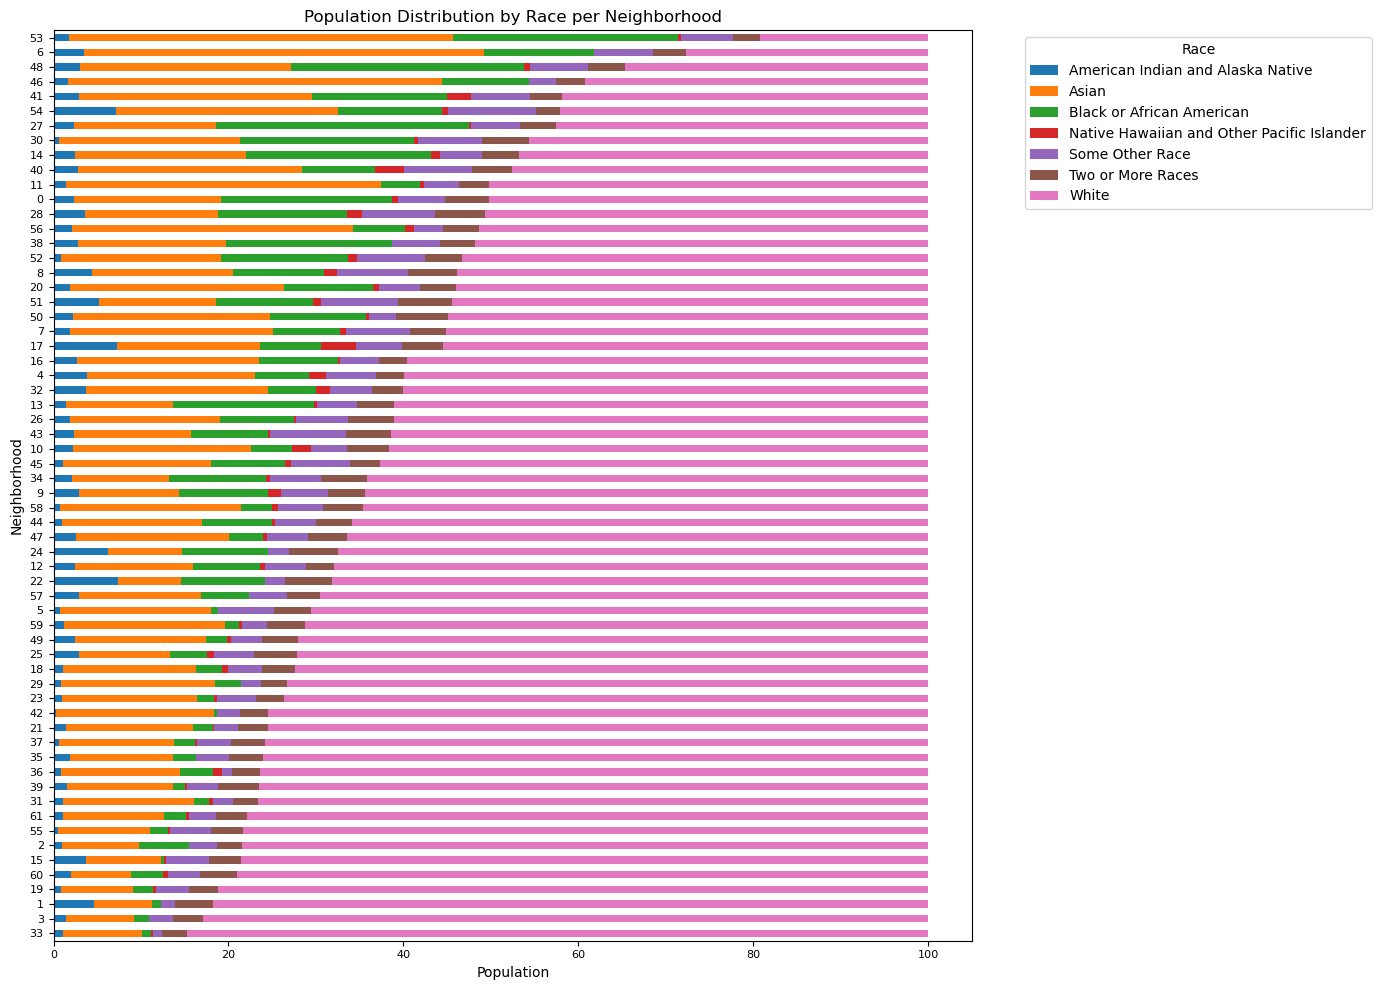

In [54]:
# Save the DataFrame with percentages to a variable
df_percentages = race_percentage.drop(columns='Total')

# Sorting the neighborhoods by the percentage of the white population in descending order
df_percentages_sorted = df_percentages.sort_values(by='White', ascending=False)

# Plotting population distribution by race per neighborhood
df_percentages_sorted.plot(kind='barh', stacked=True, figsize=(14, 10))

plt.xlabel('Population')
plt.ylabel('Neighborhood')
plt.title('Population Distribution by Race per Neighborhood')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust font size of x-axis labels
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()

In [263]:
crime_types_seattl.head(1)

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,neighbourhood,100 Block Address,Longitude,Latitude
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,NaN,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,magnolia,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387


In [264]:
crime_types_seattl

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,neighbourhood,100 Block Address,Longitude,Latitude
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,NaN,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,magnolia,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/04/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,roosevelt/ravenna,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118
2,2020-044465,12605567653,02/02/2020 08:30:00 PM,02/02/2020 09:30:00 PM,02/05/2020 09:39:33 AM,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,roosevelt/ravenna,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384
3,2020-044225,12605174036,02/05/2020 01:17:00 AM,02/05/2020 02:21:00 AM,02/05/2020 03:30:55 AM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,magnolia,22XX BLOCK OF W RAYE ST,-122.384865,47.642927
4,2020-044076,12605081469,02/05/2020 12:51:21 AM,NaN,02/05/2020 12:51:31 AM,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,N,B,B2,ballard south,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128967,2013-247888,7687554356,07/13/2013 01:00:00 AM,NaN,07/13/2013 06:37:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,SW,F,F1,pigeon point,41XX BLOCK OF 20TH AVE SW,-122.359028,47.565702
1128968,2013-227022,7682354808,06/26/2013 11:00:00 AM,06/29/2013 06:30:00 AM,06/29/2013 09:43:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,W,Q,Q3,queen anne,1ST AVE N / VALLEY ST,-122.355386,47.626251
1128969,2012-045494,7672915592,02/14/2012 03:04:00 PM,NaN,02/14/2012 03:04:00 PM,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,N,U,U1,roosevelt/ravenna,73XX BLOCK OF ROOSEVELT WAY NE,-122.317464,47.681894
1128970,2010-328592,7692227482,09/19/2010 04:59:00 PM,NaN,09/19/2010 04:59:00 PM,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,W,M,M3,downtown commercial,5XX BLOCK OF PIKE ST,-122.335018,47.610909


In [57]:
race_count = pd.read_csv('data/Seattle/Race_counting.csv')

In [58]:
race_count

,Neighborhood Name,American Indian and Alaska Native,Asian,Black or African American,Native Hawaiian and Other Pacific Islander,Some Other Race,Two or More Races,White,Total
0,23rd & Union-Jackson,1732,12736,14664,544,4052,3786,37836,75350
1,Admiral,1470,2140,300,20,490,1400,26130,31950
2,Alki/Admiral,1464,13596,8928,24,4896,4434,121464,154806
3,Arbor Heights,1188,6456,1356,60,2268,2820,68568,82716
4,Aurora-Licton Springs,4104,20928,6672,2076,6192,3498,65100,108570
...,...,...,...,...,...,...,...,...,...
57,Upper Queen Anne,1908,9108,3600,0,2880,2460,45492,65448
58,Wallingford,632,18188,3156,564,4496,4068,56760,87864
59,Wedgwood/View Ridge,1928,29216,2680,520,4584,6824,113560,159312
60,West Seattle Junction/Genesee Hill,6348,22560,11736,1872,11940,13944,257532,325932


In [59]:
top_five_neigh_race = pd.read_csv('data/Seattle/top_five_neighborhood_race.csv')

In [60]:
top_five_neigh_race

,Unnamed: 0,Neighborhood Name,American Indian and Alaska Native,Asian,Black or African American,Native Hawaiian and Other Pacific Islander,Some Other Race,Two or More Races,White,Total
0,27,High Point,2988,20532,36792,300,7068,5250,53964,126894
1,46,Pioneer Square/International District,666,16782,3906,6,1200,1284,15438,39282
2,48,Rainier Beach,10080,78786,87372,2250,21744,14022,113778,328032
3,53,South Beacon Hill/NewHolly,1268,30556,17900,244,4152,2174,13392,69686
4,54,South Park,1228,4396,2060,120,1728,486,7280,17298


In [61]:
top_five_clean = pd.read_csv('data/Seattle/top_five_neighborhoods_repo.csv')

In [62]:
top_five_clean

,Neighborhood Name,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,SOUTH BEACON HILL/NEWHOLLY,799,663,640,627,656,622,657,554,757
1,RAINIER BEACH,848,703,778,644,819,640,521,550,683
2,PIONEER SQUARE/INTERNATIONAL DISTRICT,3001,2876,3285,3384,3691,3586,2975,2899,3024
3,SOUTH PARK,653,554,604,556,683,660,512,531,540
4,HIGH POINT,433,542,615,639,591,563,657,660,603


In [63]:
race_distribution_clean = pd.read_csv('data/Seattle/race_distribution_clean.csv')

In [64]:
race_distribution_clean

,Neighborhood Name,Unnamed: 0,American Indian and Alaska Native,Asian,Black or African American,Native Hawaiian and Other Pacific Islander,Some Other Race,Two or More Races,White,Total
0,HIGH POINT,27,2988,20532,36792,300,7068,5250,53964,126894
1,PIONEER SQUARE/INTERNATIONAL DISTRICT,46,666,16782,3906,6,1200,1284,15438,39282
2,RAINIER BEACH,48,10080,78786,87372,2250,21744,14022,113778,328032
3,SOUTH BEACON HILL/NEWHOLLY,53,1268,30556,17900,244,4152,2174,13392,69686
4,SOUTH PARK,54,1228,4396,2060,120,1728,486,7280,17298


# Final Data Sets

In [ ]:
#Seattle City Code:
#city       state       state_code      county_code     place_code
#Seattle	WA	        53	            000	            63000

In [265]:
crime_types_seattl

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,neighbourhood,100 Block Address,Longitude,Latitude
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,NaN,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,magnolia,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/04/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,roosevelt/ravenna,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118
2,2020-044465,12605567653,02/02/2020 08:30:00 PM,02/02/2020 09:30:00 PM,02/05/2020 09:39:33 AM,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,roosevelt/ravenna,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384
3,2020-044225,12605174036,02/05/2020 01:17:00 AM,02/05/2020 02:21:00 AM,02/05/2020 03:30:55 AM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,magnolia,22XX BLOCK OF W RAYE ST,-122.384865,47.642927
4,2020-044076,12605081469,02/05/2020 12:51:21 AM,NaN,02/05/2020 12:51:31 AM,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,N,B,B2,ballard south,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128967,2013-247888,7687554356,07/13/2013 01:00:00 AM,NaN,07/13/2013 06:37:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,SW,F,F1,pigeon point,41XX BLOCK OF 20TH AVE SW,-122.359028,47.565702
1128968,2013-227022,7682354808,06/26/2013 11:00:00 AM,06/29/2013 06:30:00 AM,06/29/2013 09:43:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,W,Q,Q3,queen anne,1ST AVE N / VALLEY ST,-122.355386,47.626251
1128969,2012-045494,7672915592,02/14/2012 03:04:00 PM,NaN,02/14/2012 03:04:00 PM,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,N,U,U1,roosevelt/ravenna,73XX BLOCK OF ROOSEVELT WAY NE,-122.317464,47.681894
1128970,2010-328592,7692227482,09/19/2010 04:59:00 PM,NaN,09/19/2010 04:59:00 PM,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,W,M,M3,downtown commercial,5XX BLOCK OF PIKE ST,-122.335018,47.610909


In [266]:
# convert to date time -  call_seattle['Original Time Queued'] = pd.to_datetime(call_seattle['Original Time Queued'])
crime_types_seattl['Offense Start DateTime'] = pd.to_datetime(crime_types_seattl['Offense Start DateTime'])

In [267]:
#extract year - call_seat_beat['year'] = call_seat_beat.original_time_queued.dt.year 
crime_types_seattl['year'] = crime_types_seattl['Offense Start DateTime'].dt.year

In [268]:
crime_types_seattl.head(1)

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,neighbourhood,100 Block Address,Longitude,Latitude,year
0,2020-044620,12605873663,2020-02-05 10:10:00,NaN,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,magnolia,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387,2020.0


In [269]:
crime_types_seattl['year'].isnull().value_counts()

year
False    1127162
True        1810
Name: count, dtype: int64

In [270]:
crime_types_seattl['year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1128972 entries, 0 to 1128971
Series name: year
Non-Null Count    Dtype  
--------------    -----  
1127162 non-null  float64
dtypes: float64(1)
memory usage: 8.6 MB


In [271]:
#df['count'].astype(int)
crime_types_seattl['year'] = crime_types_seattl['year'].astype(str).str.split('.').str[0]

In [272]:
crime_types_seattl.columns = crime_types_seattl.columns.str.lower().str.replace(' ', '_').str.strip()

In [273]:
crime_types_seattl.head(1)

,report_number,offense_id,offense_start_datetime,offense_end_datetime,report_datetime,group_a_b,crime_against_category,offense_parent_group,offense,offense_code,precinct,sector,beat,neighbourhood,100_block_address,longitude,latitude,year
0,2020-044620,12605873663,2020-02-05 10:10:00,NaN,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,magnolia,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387,2020


In [275]:
crime_types_seattl['year'].sort_values(ascending=False)

979800      nan
904225      nan
904202      nan
904203      nan
904204      nan
           ... 
1096271    1934
903269     1929
906972     1920
903123     1915
498359     1908
Name: year, Length: 1128972, dtype: object

In [283]:
#call_seattle_years5 = call_seattle[call_seattle['original_time_queued'].dt.year.isin([2011 ,2012 ,2013 ,2014, 2015, 2016, 2017, 2018, 2019])] #newly filtered for the years 2011-2019
#call_type_filter = call_seattle_years5[call_seattle_years5['call_type'] == '911']
crime_types_seattl_filter = crime_types_seattl[((crime_types_seattl['year'] == '2011') | (crime_types_seattl['year'] == '2012') | (crime_types_seattl['year'] == '2013') | (crime_types_seattl['year'] == '2014') | (crime_types_seattl['year'] == '2015') | (crime_types_seattl['year'] == '2016') | (crime_types_seattl['year'] == '2017') | (crime_types_seattl['year'] == '2018') | (crime_types_seattl['year'] == '2019'))]

In [284]:
crime_types_seattl_filter['year'].value_counts()

year
2018    75330
2017    73086
2019    70454
2016    70409
2014    69557
2015    67862
2013    63670
2011    59241
2012    58982
Name: count, dtype: int64

In [285]:
crime_types_seattl_filter

,report_number,offense_id,offense_start_datetime,offense_end_datetime,report_datetime,group_a_b,crime_against_category,offense_parent_group,offense,offense_code,precinct,sector,beat,neighbourhood,100_block_address,longitude,latitude,year
11,2020-043971,12604927228,2019-02-04 00:00:00,02/04/2020 08:00:00 AM,02/04/2020 09:18:52 PM,A,PROPERTY,FRAUD OFFENSES,Wire Fraud,26E,N,U,U2,university,45XX BLOCK OF 7TH AVE NE,-122.320720,47.662473,2019
56,2020-042066,12603358305,2019-12-18 12:00:00,NaN,02/03/2020 07:38:23 PM,A,PROPERTY,FRAUD OFFENSES,False Pretenses/Swindle/Confidence Game,26A,N,J,J3,roosevelt/ravenna,71XX BLOCK OF WOODLAWN AVE NE,-122.324611,47.680156,2019
97,2020-901669,12602800513,2019-11-15 20:00:00,11/15/2019 10:00:00 PM,02/03/2020 12:12:18 PM,A,PROPERTY,LARCENY-THEFT,Theft From Building,23D,W,K,K2,pioneer square,8XX BLOCK OF OCCIDENTAL AVE S,-122.333268,47.596783,2019
138,2020-901632,12602385305,2019-02-07 00:00:00,02/02/2020 12:00:00 PM,02/03/2020 07:42:15 AM,A,PROPERTY,FRAUD OFFENSES,Identity Theft,26F,SW,W,W1,north admiral,34XX BLOCK OF 36TH AVE SW,-122.377092,47.572153,2019
172,2020-040844,12601680195,2019-12-25 00:00:00,01/20/2020 12:00:00 AM,02/02/2020 03:04:05 PM,A,PROPERTY,FRAUD OFFENSES,Impersonation,26C,E,G,G3,judkins park/north beacon hill,4XX BLOCK OF 23RD AVE S,-122.302231,47.598579,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128965,2017-331241,7664425617,2017-09-04 08:41:00,NaN,09/06/2017 10:12:00 AM,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,W,M,M3,downtown commercial,14XX BLOCK OF 3RD AVE,-122.337339,47.609253,2017
1128966,2014-122134,7699116275,2014-03-20 10:30:00,04/21/2014 01:30:00 PM,04/21/2014 03:02:00 PM,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,W,D,D2,queen anne,27XX BLOCK OF WESTLAKE AVE N,-122.347302,47.645030,2014
1128967,2013-247888,7687554356,2013-07-13 01:00:00,NaN,07/13/2013 06:37:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,SW,F,F1,pigeon point,41XX BLOCK OF 20TH AVE SW,-122.359028,47.565702,2013
1128968,2013-227022,7682354808,2013-06-26 11:00:00,06/29/2013 06:30:00 AM,06/29/2013 09:43:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,W,Q,Q3,queen anne,1ST AVE N / VALLEY ST,-122.355386,47.626251,2013


In [286]:
crime_types_seattl_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 608591 entries, 11 to 1128969
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   report_number           608591 non-null  object        
 1   offense_id              608591 non-null  int64         
 2   offense_start_datetime  608591 non-null  datetime64[ns]
 3   offense_end_datetime    305779 non-null  object        
 4   report_datetime         608591 non-null  object        
 5   group_a_b               608591 non-null  object        
 6   crime_against_category  608591 non-null  object        
 7   offense_parent_group    608591 non-null  object        
 8   offense                 608591 non-null  object        
 9   offense_code            608591 non-null  object        
 10  precinct                608591 non-null  object        
 11  sector                  608591 non-null  object        
 12  beat                    608591 no

In [287]:
crime_types_seattl_filter['report_number'].sort_values(ascending=False)

829874     3029-400689
1124902    2024-933156
1124903    2024-933155
1121057    2024-932641
1115867    2024-932398
              ...     
405985     2011-000068
405983     2011-000062
405986     2011-000048
405981     2011-000029
11983      1919-368471
Name: report_number, Length: 608591, dtype: object

In [299]:
#FIRST run it down
call_type_filter_years['cad_event_number'].sort_values(ascending=False)

93602      2019000483163
2636056    2019000483158
2375302    2019000483152
3353846    2019000483150
1011738    2019000483147
               ...      
3449302    2014000000010
3100233    2014000000007
1710062    2014000000006
4917482    2014000000005
2733435    2014000000004
Name: cad_event_number, Length: 906442, dtype: int64

In [289]:
crime_types_seattl_filter['beat'].value_counts().count()

54

In [300]:
#filter for one beat for both data sets and compare the times and long and lat of the datasets list of columns to merge on
crime_types_seattl_filter['offense_start_datetime'].isin(call_type_filter_years['original_time_queued']).value_counts()

offense_start_datetime
False    606255
True       2336
Name: count, dtype: int64

In [290]:
crime_types_seattl_filter['report_datetime'] = pd.to_datetime(crime_types_seattl_filter['report_datetime'])

/var/folders/kt/c_d917yx6vs3yh3pfv_r5dyc0000gn/T/ipykernel_32018/528958985.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_types_seattl_filter['report_datetime'] = pd.to_datetime(crime_types_seattl_filter['report_datetime'])
/var/folders/kt/c_d917yx6vs3yh3pfv_r5dyc0000gn/T/ipykernel_32018/528958985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_types_seattl_filter['report_datetime'] = pd.to_datetime(crime_types_seattl_filter['report_datetime'])


In [291]:
#filter for one beat crime_types_seattl_filter

crime_filter_beat_u2 = crime_types_seattl_filter[crime_types_seattl_filter['beat'] == 'U2']
crime_filter_beat_u2

,report_number,offense_id,offense_start_datetime,offense_end_datetime,report_datetime,group_a_b,crime_against_category,offense_parent_group,offense,offense_code,precinct,sector,beat,neighbourhood,100_block_address,longitude,latitude,year
11,2020-043971,12604927228,2019-02-04 00:00:00,02/04/2020 08:00:00 AM,2020-02-04 21:18:52,A,PROPERTY,FRAUD OFFENSES,Wire Fraud,26E,N,U,U2,university,45XX BLOCK OF 7TH AVE NE,-122.320720,47.662473,2019
372,2020-901505,12595671463,2019-11-28 15:00:00,11/28/2019 04:00:00 PM,2020-01-31 06:32:31,A,PROPERTY,FRAUD OFFENSES,Credit Card/Automated Teller Machine Fraud,26B,N,U,U2,university,41XX BLOCK OF 11TH AVE NE,-122.316665,47.657917,2019
554,2020-901398,12461441101,2019-01-28 22:15:00,01/28/2020 10:40:00 PM,2020-01-29 11:22:44,A,PROPERTY,LARCENY-THEFT,Theft From Motor Vehicle,23F,N,U,U2,university,47XX BLOCK OF BROOKLYN AVE NE,-122.314224,47.664004,2019
1316,2020-901007,12203180060,2019-12-07 12:30:00,12/07/2019 12:35:00 PM,2020-01-22 13:33:36,A,PROPERTY,LARCENY-THEFT,Theft From Motor Vehicle,23F,N,U,U2,university,41XX BLOCK OF ROOSEVELT WAY NE,-122.317811,47.657202,2019
2811,2020-006879,12146374441,2019-12-24 00:00:00,12/25/2019 03:00:00 AM,2020-01-06 22:09:39,A,PROPERTY,LARCENY-THEFT,Theft From Building,23D,N,U,U2,university,45XX BLOCK OF 17TH AVE NE,-122.309703,47.662158,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086380,2016-245454,7697031889,2016-07-07 19:30:00,07/08/2016 11:00:00 AM,2016-07-09 09:56:00,A,PROPERTY,BURGLARY/BREAKING&ENTERING,Burglary/Breaking & Entering,220,N,U,U2,university,45XX BLOCK OF UNIVERSITY WAY NE,-122.313116,47.662181,2016
1092261,2016-250522,7635850647,2016-07-12 20:00:00,07/13/2016 08:00:00 AM,2016-07-13 08:27:00,A,PROPERTY,BURGLARY/BREAKING&ENTERING,Burglary/Breaking & Entering,220,N,U,U2,university,47XX BLOCK OF UNIVERSITY WAY NE,-122.313088,47.663996,2016
1110865,2024-906265,55582193277,2017-10-02 00:00:00,01/29/2019 11:59:00 PM,2024-04-19 09:47:26,A,PROPERTY,FRAUD OFFENSES,Identity Theft,26F,N,U,U2,university,47XX BLOCK OF 11TH AVE NE,-122.316347,47.664020,2017
1128282,2019-389781,11146900028,2019-10-18 22:00:00,10/19/2019 02:00:00 AM,2019-10-19 04:12:40,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,N,U,U2,university,NE 41ST ST / UNIVERSITY WAY NE,-122.313246,47.656834,2019


In [301]:
crime_filter_beat_u2['report_datetime'].isin(call_filter_years_beat_u2['original_time_queued']).value_counts() #2 matches and 11018 no matches

report_datetime
False    15118
True         2
Name: count, dtype: int64

In [176]:
#crime_filter_beat_u2[['longitude','latitude']].isin(call_filter_years_beat_u2[['blurred_longitude','blurred_latitude']]).value_counts() #0 matches
#crime_filter_beat_u2['longitude'].isin(call_filter_years_beat_u2['blurred_longitude']).value_counts()  #2246 matches and 8774 do not match
#crime_filter_beat_u2['latitude'].isin(call_filter_years_beat_u2['blurred_latitude']).value_counts()     #10766 match and 254 do not match

longitude  latitude
False      False       11020
Name: count, dtype: int64

In [314]:
call_filter_years_beat_u2['cad_event_number'] = call_filter_years_beat_u2['cad_event_number'].astype('str')

/var/folders/kt/c_d917yx6vs3yh3pfv_r5dyc0000gn/T/ipykernel_32018/2897751252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  call_filter_years_beat_u2['cad_event_number'] = call_filter_years_beat_u2['cad_event_number'].astype('str')


In [315]:
call_filter_years_beat_u2['cad_event_number'].info()

<class 'pandas.core.series.Series'>
Index: 22576 entries, 161 to 5802680
Series name: cad_event_number
Non-Null Count  Dtype 
--------------  ----- 
22576 non-null  object
dtypes: object(1)
memory usage: 352.8+ KB


In [316]:
#compare report numbers and cad number
#s.str.startswith(('b', 'B'))
#crime_filter_beat_u2['report_number'].isin(call_filter_years_beat_u2['cad_event_number']).value_counts() #all false
#crime_filter_beat_u2['report_number'].str.startswith(('2014', '2015', '2016', '2017', '2018', '2019')).value_counts()
call_filter_years_beat_u2['cad_event_number'].str.startswith(('2011','2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019')).value_counts()

cad_event_number
True    22576
Name: count, dtype: int64

In [318]:
#convert with z-fill function the CAD and Report Number in the data sets and then check if they match(also per beat?)
#use replace to replace '-' with 3 more 0  (data - call_type_filter_years and crime_types_seattl_filter)

crime_types_seattl_filter['report_number'] = crime_types_seattl_filter['report_number'].str.replace('-', '000')
crime_types_seattl_filter.head(1)

/var/folders/kt/c_d917yx6vs3yh3pfv_r5dyc0000gn/T/ipykernel_32018/1761245522.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_types_seattl_filter['report_number'] = crime_types_seattl_filter['report_number'].str.replace('-', '000')


,report_number,offense_id,offense_start_datetime,offense_end_datetime,report_datetime,group_a_b,crime_against_category,offense_parent_group,offense,offense_code,precinct,sector,beat,neighbourhood,100_block_address,longitude,latitude,year
11,2020000043971,12604927228,2019-02-04,02/04/2020 08:00:00 AM,2020-02-04 21:18:52,A,PROPERTY,FRAUD OFFENSES,Wire Fraud,26E,N,U,U2,university,45XX BLOCK OF 7TH AVE NE,-122.32072,47.662473,2019


In [319]:
crime_filter_beat_u2['report_number'].isin(call_filter_years_beat_u2['cad_event_number']).value_counts()  #4171 matches and 6849 no matches

report_number
False    15120
Name: count, dtype: int64

In [320]:
crime_filter_beat_u2['report_number'].isin(call_filter_years_beat_u2['cad_event_number']).sort_values()

11         False
544247     False
544308     False
544338     False
544360     False
           ...  
204259     False
204309     False
204317     False
203833     False
1128330    False
Name: report_number, Length: 15120, dtype: bool

In [321]:
crime_types_seattl_filter[crime_types_seattl_filter['report_number'].isin(call_type_filter_years['cad_event_number'])]

,report_number,offense_id,offense_start_datetime,offense_end_datetime,report_datetime,group_a_b,crime_against_category,offense_parent_group,offense,offense_code,precinct,sector,beat,neighbourhood,100_block_address,longitude,latitude,year


In [322]:
#for same report number and cad number compare(choose 10) if the beats match
check_beats_crime = crime_types_seattl_filter[(crime_types_seattl_filter['report_number'] == '2019000246305') | (crime_types_seattl_filter['report_number'] == '2019000451348') | (crime_types_seattl_filter['report_number'] == '2019000482898') | (crime_types_seattl_filter['report_number'] == '2019000483122') | (crime_types_seattl_filter['report_number'] == '2019000483144') | (crime_types_seattl_filter['report_number'] == '2019000345671') | (crime_types_seattl_filter['report_number'] == '2019000238471') | (crime_types_seattl_filter['report_number'] == '2019000233732') | (crime_types_seattl_filter['report_number'] == '2019000163961') | (crime_types_seattl_filter['report_number'] == '2019000344453')]

In [323]:
check_beats_call = call_type_filter_years[(call_type_filter_years['cad_event_number'] == '2019000246305') | (call_type_filter_years['cad_event_number'] == '2019000451348') | (call_type_filter_years['cad_event_number'] == '2019000482898') | (call_type_filter_years['cad_event_number'] == '2019000483122') | (call_type_filter_years['cad_event_number'] == '2019000483144') | (call_type_filter_years['cad_event_number'] == '2019000345671') | (call_type_filter_years['cad_event_number'] == '2019000238471') | (call_type_filter_years['cad_event_number'] == '2019000233732') | (call_type_filter_years['cad_event_number'] == '2019000163961') | (call_type_filter_years['cad_event_number'] == '2019000344453')]

In [324]:
check_beats_crime['beat'].isin(check_beats_call['beat'])

696        False
1481       False
3318       False
3321       False
3326       False
1115744    False
1128300    False
1128327    False
1128330    False
1128353    False
1128963    False
Name: beat, dtype: bool

In [325]:
check_beats_crime

,report_number,offense_id,offense_start_datetime,offense_end_datetime,report_datetime,group_a_b,crime_against_category,offense_parent_group,offense,offense_code,precinct,sector,beat,neighbourhood,100_block_address,longitude,latitude,year
696,2019000246305,12369550557,2019-07-05 20:22:00,07/05/2019 09:10:00 PM,2020-01-28 11:59:46,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,N,B,B1,ballard south,30XX BLOCK OF NW MARKET ST,-122.395076,47.668646,2019
1481,2019000451348,12174762005,2019-12-06 08:42:00,12/06/2019 08:43:00 AM,2020-01-20 21:37:31,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,D,D2,slu/cascade,20XX BLOCK OF WESTLAKE AVE,-122.337879,47.615887,2019
3318,2019000482898,12135479863,2019-12-31 19:32:00,NaN,2020-01-01 03:04:34,A,PROPERTY,ROBBERY,Robbery,120,W,D,D1,slu/cascade,25XX BLOCK OF 4TH AVE,-122.346638,47.616967,2019
3321,2019000483122,12135440143,2019-12-31 00:00:00,NaN,2020-01-01 02:07:30,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,N,B,B1,ballard south,20XX BLOCK OF NW MARKET ST,-122.382621,47.668676,2019
3326,2019000483144,12135374409,2019-12-31 23:37:00,01/01/2020 12:00:00 AM,2020-01-01 00:50:03,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,N,U,U2,university,47XX BLOCK OF BROOKLYN AVE NE,-122.314224,47.664004,2019
1115744,2019000344453,10369616318,2019-09-14 16:11:00,NaN,2019-09-14 19:36:14,A,PROPERTY,ROBBERY,Robbery,120,W,M,M2,downtown commercial,4XX BLOCK OF PINE ST,-122.337320,47.611321,2019
1128300,2019000345671,10370453020,2019-09-13 23:00:00,09/15/2019 04:45:00 PM,2019-09-15 20:20:34,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,N,B,B1,ballard south,15XX BLOCK OF NW 63RD ST,-122.377546,47.674549,2019
1128327,2019000238471,8538240648,2019-06-30 12:05:00,NaN,2019-06-30 15:56:29,A,PROPERTY,LARCENY-THEFT,All Other Larceny,23H,W,Q,Q3,slu/cascade,5TH AVE N / MERCER ST,-122.347571,47.624561,2019
1128330,2019000233732,8434296084,2019-06-26 19:05:00,NaN,2019-06-26 21:12:39,A,PROPERTY,ARSON,Arson,200,N,U,U2,university,7XX BLOCK OF NE 42ND ST,-122.320319,47.657518,2019
1128353,2019000163961,8199249497,2019-05-07 20:35:00,05/07/2019 10:20:00 PM,2019-05-07 23:06:17,A,PROPERTY,ARSON,Arson,200,W,Q,Q1,magnolia,NaN,0.000000,0.000000,2019


In [326]:
check_beats_call

,cad_event_number,event_clearance_description,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,blurred_longitude,blurred_latitude,response_time,year


In [327]:
#filter for one beat call_type_filter_years
call_filter_years_beat_u2 = call_type_filter_years[call_type_filter_years['beat'] == 'U2']
call_filter_years_beat_u2

,cad_event_number,event_clearance_description,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,blurred_longitude,blurred_latitude,response_time,year
161,2016000371099,ASSISTANCE RENDERED,911,2.0,SHOPLIFT - THEFT,--THEFT - SHOPLIFT,2016-10-13 09:24:16,2016-10-13 09:32:06,NORTH,UNION,U2,-122.313149,47.660532,7.833333,2016
179,2016000085627,ASSISTANCE RENDERED,911,3.0,DISTURBANCE,--DISTURBANCE - OTHER,2016-03-11 05:04:15,2016-03-11 05:11:38,NORTH,UNION,U2,-122.315251,47.664012,7.383333,2016
183,2015000392986,ASSISTANCE RENDERED,911,3.0,NUISANCE,TRESPASS,2015-11-10 09:22:05,2015-11-10 09:29:50,NORTH,UNION,U2,-122.313708,47.661273,7.750000,2015
223,2015000175939,ASSISTANCE RENDERED,911,3.0,OBS - PROWLER,--PROWLER - TRESPASS,2015-05-28 10:11:23,2015-05-28 12:01:44,NORTH,UNION,U2,-122.320325,47.655876,110.350000,2015
224,2018000198768,ASSISTANCE RENDERED,911,2.0,NUISANCE,--DISTURBANCE - OTHER,2018-06-02 03:58:32,2018-06-02 04:13:11,NORTH,UNION,U2,-122.321364,47.657520,14.650000,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5802263,2019000478378,REPORT WRITTEN (NO ARREST),911,5.0,TRU - THEFT,--THEFT - CAR PROWL,2019-12-27 18:42:50,2019-12-27 19:36:18,NORTH,UNION,U2,-122.316579,47.661292,53.466667,2019
5802635,2016000139420,ASSISTANCE RENDERED,911,2.0,"PANHANDLING, AGGRESSIVE",--MISCHIEF OR NUISANCE - GENERAL,2016-04-22 15:59:38,2016-04-22 16:15:39,NORTH,UNION,U2,-122.313116,47.662181,16.016667,2016
5802671,2015000321458,ASSISTANCE RENDERED,911,3.0,DISTURBANCE,--PROWLER - TRESPASS,2015-09-13 11:08:44,2015-09-13 11:42:47,NORTH,UNION,U2,-122.313227,47.657575,34.050000,2015
5802676,2015000322399,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,911,3.0,NUISANCE,--DISTURBANCE - OTHER,2015-09-14 10:29:58,NaT,NORTH,UNION,U2,-122.313149,47.660532,NaN,2015


In [328]:
call_type_filter_years['cad_event_number'] = call_type_filter_years['cad_event_number'].astype('str')
call_type_filter_years.info()

<class 'pandas.core.frame.DataFrame'>
Index: 906442 entries, 4 to 5804742
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   cad_event_number             906442 non-null  object        
 1   event_clearance_description  906442 non-null  object        
 2   call_type                    906442 non-null  object        
 3   priority                     906442 non-null  float64       
 4   initial_call_type            906442 non-null  object        
 5   final_call_type              906442 non-null  object        
 6   original_time_queued         906442 non-null  datetime64[ns]
 7   arrived_time                 813742 non-null  datetime64[ns]
 8   precinct                     906442 non-null  object        
 9   sector                       906151 non-null  object        
 10  beat                         906442 non-null  object        
 11  blurred_longitude            9

/var/folders/kt/c_d917yx6vs3yh3pfv_r5dyc0000gn/T/ipykernel_32018/3245996912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  call_type_filter_years['cad_event_number'] = call_type_filter_years['cad_event_number'].astype('str')


In [329]:
call_type_filter_years['call_type'].value_counts()

call_type
911    906442
Name: count, dtype: int64

In [330]:
call_type_filter   #daily hourly data from 2014 to 2022

,cad_event_number,event_clearance_description,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,blurred_longitude,blurred_latitude,response_time,year
4,2015000031794,ASSISTANCE RENDERED,911,3.0,TRAFFIC - BO SIGNALS AND DOWN SIGNS,--HAZARDS - HAZARDS,2015-01-28 14:17:37,2015-01-28 14:23:15,EAST,CHARLIE,C1,-122.312722,47.619664,5.633333,2015
17,2016000355154,ASSISTANCE RENDERED,911,3.0,SERVICE - WELFARE CHECK,"--CASUALTY,NON-TRAF,NON-CRIM - NON-DRUG RELATED",2016-09-30 16:58:59,2016-09-30 18:38:10,WEST,MARY,M1,-122.341892,47.607341,99.183333,2016
28,2019000216385,REPORT WRITTEN (NO ARREST),911,1.0,ASLT - CRITICAL (NO SHOOTINGS),--DV - DOMESTIC VIOL/ASLT (ARREST MANDATORY),2019-06-14 04:55:09,2019-06-14 05:01:15,NORTH,NORA,N2,-122.347772,47.731677,6.100000,2019
37,2011000129474,ASSISTANCE RENDERED,911,1.0,MISSING - CHILD,--ASSIST PUBLIC - OTHER (NON-SPECIFIED),2011-04-23 14:34:20,NaT,WEST,MARY,M1,-122.341335,47.606903,NaN,2011
40,2015000038378,ASSISTANCE RENDERED,911,3.0,NUISANCE,--MISCHIEF OR NUISANCE - GENERAL,2015-02-03 06:17:07,2015-02-03 06:38:22,WEST,KING,K3,-122.326365,47.597934,21.250000,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5804723,2019000462678,ASSISTANCE RENDERED,911,2.0,HAZ - POTENTIAL THRT TO PHYS SAFETY,--HAZARDS - HAZARDS,2019-12-14 18:02:42,2019-12-14 18:20:49,WEST,DAVID,D2,-122.343656,47.624552,18.116667,2019
5804727,2019000324251,ASSISTANCE RENDERED,911,3.0,LIQUOR VIOLATIONS - ADULT,--INTOX & LIQ VIOLS - ADULTS (VIOLATIONS),2019-08-30 17:39:51,NaT,WEST,MARY,M1,-122.339257,47.610511,NaN,2019
5804729,2012000064379,ORAL WARNING GIVEN,911,2.0,DISTURBANCE,--DISTURBANCE - OTHER,2012-03-02 17:16:29,2012-03-02 17:19:03,WEST,MARY,M1,-122.341960,47.610682,2.566667,2012
5804735,2017000343826,ORAL WARNING GIVEN,911,2.0,"NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)",--NARCOTICS - OTHER,2017-09-15 12:11:10,2017-09-15 12:23:37,WEST,MARY,M3,-122.333001,47.610382,12.450000,2017


In [331]:
call_type_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1317922 entries, 4 to 5804742
Data columns (total 15 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   cad_event_number             1317922 non-null  int64         
 1   event_clearance_description  1317922 non-null  object        
 2   call_type                    1317922 non-null  object        
 3   priority                     1317922 non-null  float64       
 4   initial_call_type            1317922 non-null  object        
 5   final_call_type              1317922 non-null  object        
 6   original_time_queued         1317922 non-null  datetime64[ns]
 7   arrived_time                 1173286 non-null  datetime64[ns]
 8   precinct                     1317922 non-null  object        
 9   sector                       1317503 non-null  object        
 10  beat                         1317922 non-null  object        
 11  blurred_longitud

In [332]:
call_type_filter['year'] = call_type_filter['original_time_queued'].dt.year

/var/folders/kt/c_d917yx6vs3yh3pfv_r5dyc0000gn/T/ipykernel_32018/3004358601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  call_type_filter['year'] = call_type_filter['original_time_queued'].dt.year


In [333]:
call_type_filter['year'].value_counts()

year
2014    159083
2015    155973
2013    154326
2016    152576
2017    152403
2018    145103
2019    141304
2012    136795
2011    120359
Name: count, dtype: int64

In [334]:
call_type_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1317922 entries, 4 to 5804742
Data columns (total 15 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   cad_event_number             1317922 non-null  int64         
 1   event_clearance_description  1317922 non-null  object        
 2   call_type                    1317922 non-null  object        
 3   priority                     1317922 non-null  float64       
 4   initial_call_type            1317922 non-null  object        
 5   final_call_type              1317922 non-null  object        
 6   original_time_queued         1317922 non-null  datetime64[ns]
 7   arrived_time                 1173286 non-null  datetime64[ns]
 8   precinct                     1317922 non-null  object        
 9   sector                       1317503 non-null  object        
 10  beat                         1317922 non-null  object        
 11  blurred_longitud

In [336]:
#I run it here FIRST !!
call_type_filter_years = call_type_filter[((call_type_filter['year'] == 2011) | (call_type_filter['year'] == 2012) | (call_type_filter['year'] == 2013) | (call_type_filter['year'] == 2014) | (call_type_filter['year'] == 2015) | (call_type_filter['year'] == 2016) | (call_type_filter['year'] == 2017) | (call_type_filter['year'] == 2018) | (call_type_filter['year'] == 2019))]

In [337]:
call_type_filter_years['year'].value_counts()

year
2014    159083
2015    155973
2013    154326
2016    152576
2017    152403
2018    145103
2019    141304
2012    136795
2011    120359
Name: count, dtype: int64

In [338]:
call_type_filter_years.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1317922 entries, 4 to 5804742
Data columns (total 15 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   cad_event_number             1317922 non-null  int64         
 1   event_clearance_description  1317922 non-null  object        
 2   call_type                    1317922 non-null  object        
 3   priority                     1317922 non-null  float64       
 4   initial_call_type            1317922 non-null  object        
 5   final_call_type              1317922 non-null  object        
 6   original_time_queued         1317922 non-null  datetime64[ns]
 7   arrived_time                 1173286 non-null  datetime64[ns]
 8   precinct                     1317922 non-null  object        
 9   sector                       1317503 non-null  object        
 10  beat                         1317922 non-null  object        
 11  blurred_longitud

In [339]:
call_type_filter_years

,cad_event_number,event_clearance_description,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,blurred_longitude,blurred_latitude,response_time,year
4,2015000031794,ASSISTANCE RENDERED,911,3.0,TRAFFIC - BO SIGNALS AND DOWN SIGNS,--HAZARDS - HAZARDS,2015-01-28 14:17:37,2015-01-28 14:23:15,EAST,CHARLIE,C1,-122.312722,47.619664,5.633333,2015
17,2016000355154,ASSISTANCE RENDERED,911,3.0,SERVICE - WELFARE CHECK,"--CASUALTY,NON-TRAF,NON-CRIM - NON-DRUG RELATED",2016-09-30 16:58:59,2016-09-30 18:38:10,WEST,MARY,M1,-122.341892,47.607341,99.183333,2016
28,2019000216385,REPORT WRITTEN (NO ARREST),911,1.0,ASLT - CRITICAL (NO SHOOTINGS),--DV - DOMESTIC VIOL/ASLT (ARREST MANDATORY),2019-06-14 04:55:09,2019-06-14 05:01:15,NORTH,NORA,N2,-122.347772,47.731677,6.100000,2019
37,2011000129474,ASSISTANCE RENDERED,911,1.0,MISSING - CHILD,--ASSIST PUBLIC - OTHER (NON-SPECIFIED),2011-04-23 14:34:20,NaT,WEST,MARY,M1,-122.341335,47.606903,NaN,2011
40,2015000038378,ASSISTANCE RENDERED,911,3.0,NUISANCE,--MISCHIEF OR NUISANCE - GENERAL,2015-02-03 06:17:07,2015-02-03 06:38:22,WEST,KING,K3,-122.326365,47.597934,21.250000,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5804723,2019000462678,ASSISTANCE RENDERED,911,2.0,HAZ - POTENTIAL THRT TO PHYS SAFETY,--HAZARDS - HAZARDS,2019-12-14 18:02:42,2019-12-14 18:20:49,WEST,DAVID,D2,-122.343656,47.624552,18.116667,2019
5804727,2019000324251,ASSISTANCE RENDERED,911,3.0,LIQUOR VIOLATIONS - ADULT,--INTOX & LIQ VIOLS - ADULTS (VIOLATIONS),2019-08-30 17:39:51,NaT,WEST,MARY,M1,-122.339257,47.610511,NaN,2019
5804729,2012000064379,ORAL WARNING GIVEN,911,2.0,DISTURBANCE,--DISTURBANCE - OTHER,2012-03-02 17:16:29,2012-03-02 17:19:03,WEST,MARY,M1,-122.341960,47.610682,2.566667,2012
5804735,2017000343826,ORAL WARNING GIVEN,911,2.0,"NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)",--NARCOTICS - OTHER,2017-09-15 12:11:10,2017-09-15 12:23:37,WEST,MARY,M3,-122.333001,47.610382,12.450000,2017


In [340]:
call_type_filter_years['beat'].value_counts().count()

80

### GROUPBY

In [ ]:
#Group by beat(COUNT crimes and MEAN response time) and then correlate

/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

<Axes: xlabel='offense_start_datetime', ylabel='beat'>

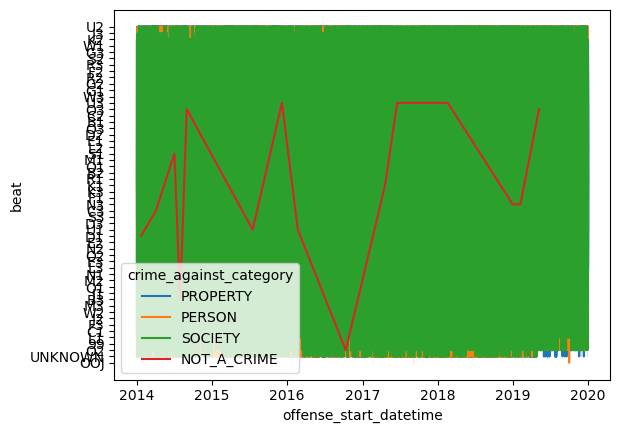

In [142]:
#sns.lineplot(data=flights, x="year", y="passengers", hue="month")
sns.lineplot(data=crime_types_seattl_filter, x="offense_start_datetime", y="beat", hue="crime_against_category")

/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

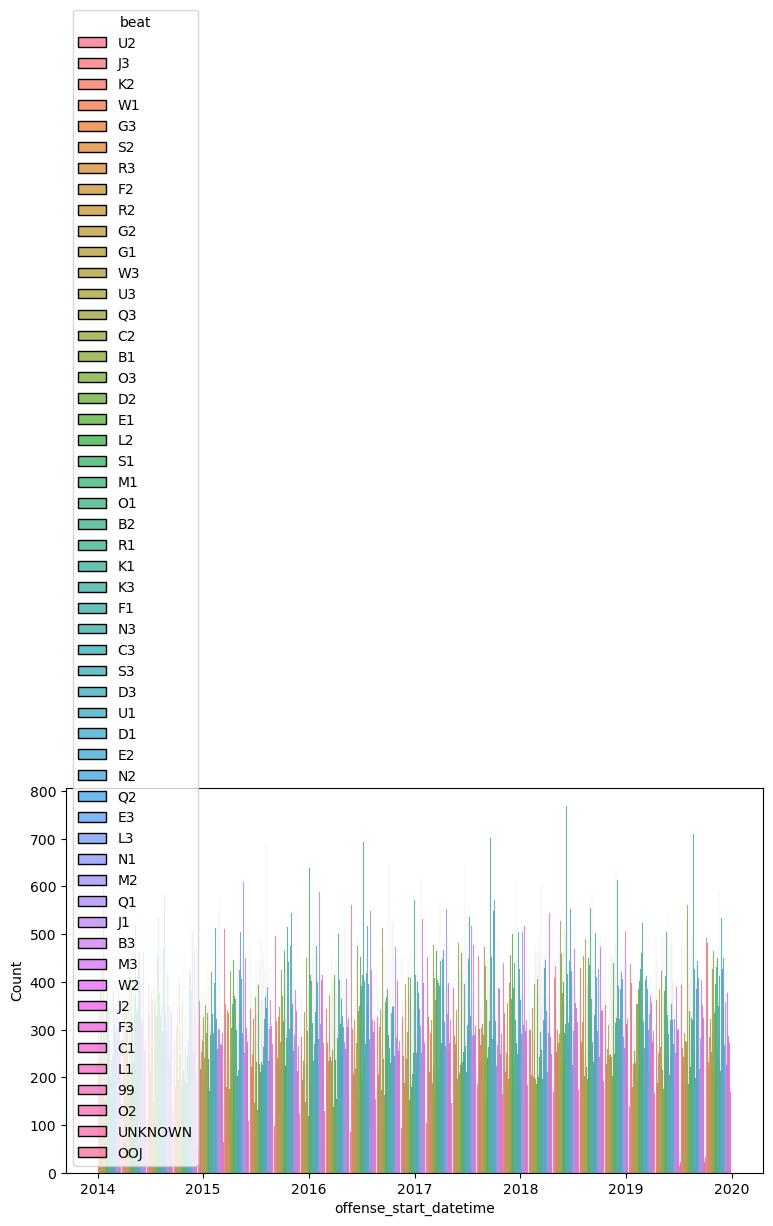

In [140]:
# To see them separately we are adding multiple parameter

plt.figure(figsize=(9,5)) 

sns.histplot(x = 'offense_start_datetime', 
             hue = 'beat',  bins=25, # hue: shading
             multiple="dodge", # options are "layer", "dodge", "stack", "fill"
             #shrink=.7,
            data= crime_types_seattl_filter);

<Axes: xlabel='beat,offense_start_datetime'>

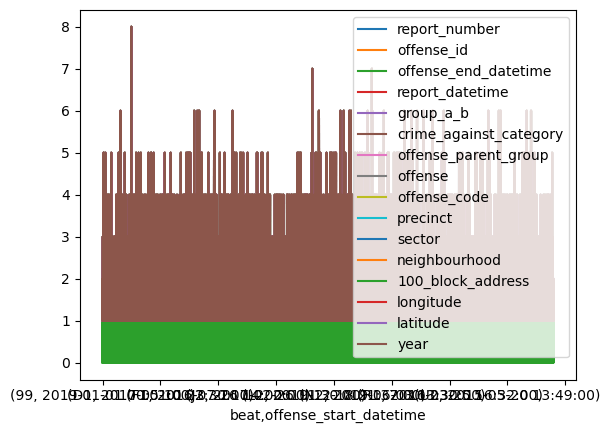

In [139]:
#crime_types_seattl_filter.groupby(['beat', 'offense_start_datetime']).count()
crime_types_seattl_filter.groupby(['beat', 'offense_start_datetime']).count().plot(legend=True)

/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_

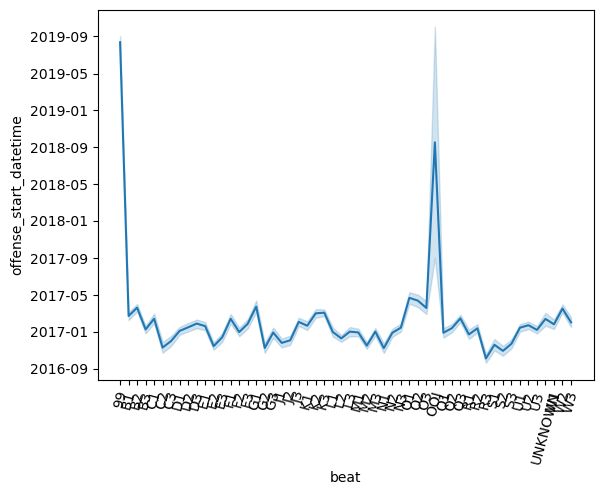

In [167]:
test = crime_types_seattl_filter.groupby(['beat', 'offense_start_datetime']).count()
test.reset_index(inplace=True)
plt.xticks(rotation=75)
sns.lineplot(x='beat', y='offense_start_datetime', data=test);

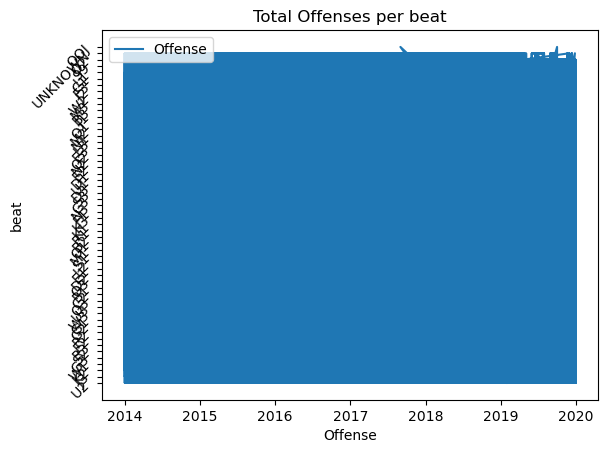

In [148]:
#Option 1 - yearly_births.plot(kind='area', x = 'year', y = 'total_births');
#Option 2

#plt.plot(yearly_births['year'], yearly_births['total_births'])
#plt.show()

#plt.scatter(x = crime_types_seattl_filter['offense_start_datetime'], y = crime_types_seattl_filter['beat'], label= 'Offense');  # or (x=,Y=,data=)
plt.plot(crime_types_seattl_filter['offense_start_datetime'], crime_types_seattl_filter['beat'], label= 'Offense');  # or (x=,Y=,data=)
#plt.figure(figsize=(10,6))
plt.xlabel('Offense')
plt.ylabel('beat')
plt.title('Total Offenses per beat')
plt.legend()
plt.yticks(rotation=45)
#plt.annotate()
plt.show();

#plt.xticks(rotation=45) 
#plt.yticks(rotation=45) 

In [102]:
call_type_filter_years.groupby(['beat', 'original_time_queued']).count()

cad_event_number  event_clearance_description  \
beat original_time_queued                                                  
99   2014-01-02 11:00:01                  1                            1   
     2014-01-07 16:04:17                  1                            1   
     2014-01-16 22:58:30                  1                            1   
     2014-01-17 18:16:39                  1                            1   
     2014-01-26 03:45:46                  1                            1   
...                                     ...                          ...   
W3   2019-12-30 22:01:05                  1                            1   
     2019-12-31 02:29:37                  1                            1   
     2019-12-31 12:41:07                  1                            1   
     2019-12-31 13:19:57                  1                            1   
     2019-12-31 20:43:53                  1                            1   

                           call_type  priority  initial_call_type  \
beat original_time_queued                                           
99   2014-01-02 11:00:01           1         1                  1   
     2014-01-07 16:04:17           1         1                  1   
     2014-01-16 22:58:30           1         1                  1   
     2014-01-17 18:16:39           1         1                  1   
     2014-01-26 03:45:46           1         1                  1   
...                              ...       ...                ...   
W3   2019-12-30 22:01:05           1         1                  1   
     2019-12-31 02:29:37           1         1                  1   
     2019-12-31 12:41:07           1         1                  1   
     2019-12-31 13:19:57           1         1                  1   
     2019-12-31 20:43:53           1         1                  1   

                           final_call_type  arrived_time  precinct  sector  \
beat original_time_queued                                                    
99   2014-01-02 11:00:01                 1             1         1       1   
     2014-01-07 16:04:17                 1             1         1       1   
     2014-01-16 22:58:30                 1             1         1       1   
     2014-01-17 18:16:39                 1             0         1       1   
     2014-01-26 03:45:46                 1             1         1       1   
...                                    ...           ...       ...     ...   
W3   2019-12-30 22:01:05                 1             1         1       1   
     2019-12-31 02:29:37                 1             1         1       1   
     2019-12-31 12:41:07                 1             1         1       1   
     2019-12-31 13:19:57                 1             1         1       1   
     2019-12-31 20:43:53                 1             1         1       1   

                           blurred_longitude  blurred_latitude  response_time  \
beat original_time_queued                                                       
99   2014-01-02 11:00:01                   1                 1              1   
     2014-01-07 16:04:17                   1                 1              1   
     2014-01-16 22:58:30                   1                 1              1   
     2014-01-17 18:16:39                   1                 1              0   
     2014-01-26 03:45:46                   1                 1              1   
...                                      ...               ...            ...   
W3   2019-12-30 22:01:05                   1                 1              1   
     2019-12-31 02:29:37                   1                 1              1   
     2019-12-31 12:41:07                   1                 1              1   
     2019-12-31 13:19:57                   1                 1              1   
     2019-12-31 20:43:53                   1                 1              1   

                           year  
beat original_time_queued        
99 

In [129]:
#df.set_index('Date_Time').groupby(pd.Grouper(freq='D')).mean()
call_type_filter_years.groupby(pd.Grouper(key='original_time_queued', axis=0,  
                      freq='M')).count()

,cad_event_number,event_clearance_description,call_type,priority,initial_call_type,final_call_type,arrived_time,precinct,sector,beat,blurred_longitude,blurred_latitude,response_time,year
original_time_queued,,,,,,,,,,,,,,
2014-01-31,12363,12363,12363,12363,12363,12363,10987,12363,12360,12363,12363,12363,10987,12363
2014-02-28,10567,10567,10567,10567,10567,10567,9200,10567,10563,10567,10567,10567,9200,10567
2014-03-31,12449,12449,12449,12449,12449,12449,10848,12449,12442,12449,12449,12449,10848,12449
2014-04-30,12411,12411,12411,12411,12411,12411,11015,12411,12408,12411,12411,12411,11015,12411
2014-05-31,13950,13950,13950,13950,13950,13950,12248,13950,13947,13950,13950,13950,12248,13950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,13198,13198,13198,13198,13198,13198,12007,13198,13193,13198,13198,13198,12007,13198
2019-09-30,12200,12200,12200,12200,12200,12200,11166,12200,12192,12200,12200,12200,11166,12200
2019-10-31,11706,11706,11706,11706,11706,11706,10713,11706,11700,11706,11706,11706,10713,11706


In [117]:
#call_type_filter_years.groupby(['original_time_queued']).count().sum()
call_type_filter_years.groupby(['original_time_queued']).count()

,cad_event_number,event_clearance_description,call_type,priority,initial_call_type,final_call_type,arrived_time,precinct,sector,beat,blurred_longitude,blurred_latitude,response_time,year
original_time_queued,,,,,,,,,,,,,,
2014-01-01 00:02:01,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2014-01-01 00:03:24,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2014-01-01 00:05:21,1,1,1,1,1,1,0,1,1,1,1,1,0,1
2014-01-01 00:06:01,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2014-01-01 00:08:52,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 23:40:56,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2019-12-31 23:43:48,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2019-12-31 23:46:48,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [116]:
#call_type_filter_years.groupby(['beat']).count().sum()
call_type_filter_years.groupby(['beat']).count()

,cad_event_number,event_clearance_description,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,blurred_longitude,blurred_latitude,response_time,year
beat,,,,,,,,,,,,,,
99,346,346,346,346,346,346,346,299,346,345,346,346,299,346
B1,21163,21163,21163,21163,21163,21163,21163,19452,21163,21163,21163,21163,19452,21163
B2,18589,18589,18589,18589,18589,18589,18589,17172,18589,18589,18589,18589,17172,18589
B3,17146,17146,17146,17146,17146,17146,17146,15846,17146,17146,17146,17146,15846,17146
C1,13470,13470,13470,13470,13470,13470,13470,12356,13470,13469,13470,13470,12356,13470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U3,16937,16937,16937,16937,16937,16937,16937,15807,16937,16936,16937,16937,15807,16937
W,13,13,13,13,13,13,13,11,13,0,13,13,11,13
W1,16832,16832,16832,16832,16832,16832,16832,15654,16832,16830,16832,16832,15654,16832


In [169]:
call_type_filter_years.groupby(['beat'])['response_time'].mean()

beat
99    53.434504
B1    55.730777
B2    54.869372
B3    55.237130
C1    30.410591
        ...    
U3    44.212931
W     55.934848
W1    34.505070
W2    32.763171
W3    33.743482
Name: response_time, Length: 77, dtype: float64

In [110]:
#result = call_type_filter_years['original_time_queued'].resample('M').sum()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [108]:
#b.groupby(by=[b.index.month, b.index.year])
#call_type_filter_years['original_time_queued'].groupby(pd.Grouper(freq='M'))

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [100]:
#CORRELATION between two DataSets
#crime_types_seattl_filter['offense_start_datetime'].corrwith(call_type_filter_years['response_time'])

AttributeError: 'Series' object has no attribute 'corrwith'

In [78]:
unemployment_rate = pd.read_csv('data/Seattle/SEAT653URN.csv')

In [79]:
unemployment_rate

,DATE,SEAT653URN
0,2014-01-01,5.5
1,2014-02-01,5.5
2,2014-03-01,5.4
3,2014-04-01,4.6
4,2014-05-01,5.0
...,...,...
103,2022-08-01,3.8
104,2022-09-01,3.6
105,2022-10-01,3.7
106,2022-11-01,3.5


# Saving to CSV

In [ ]:
#df.to_csv('out.csv', index=False) 
crime_types_seattl_filter.to_csv()

In [ ]:
call_type_filter_years.to_csv()

In [341]:
crime_types_seattl_filter.rename(columns={'report_number':'unique_id'}, inplace=True)

/var/folders/kt/c_d917yx6vs3yh3pfv_r5dyc0000gn/T/ipykernel_32018/385633400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_types_seattl_filter.rename(columns={'report_number':'unique_id'}, inplace=True)


In [342]:
call_type_filter_years.rename(columns={'cad_event_number':'unique_id'}, inplace=True)

In [343]:
call_type_filter_years['unique_id'] = call_type_filter_years['unique_id'].astype('str')

In [344]:
call_type_filter_years.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1317922 entries, 4 to 5804742
Data columns (total 15 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   unique_id                    1317922 non-null  object        
 1   event_clearance_description  1317922 non-null  object        
 2   call_type                    1317922 non-null  object        
 3   priority                     1317922 non-null  float64       
 4   initial_call_type            1317922 non-null  object        
 5   final_call_type              1317922 non-null  object        
 6   original_time_queued         1317922 non-null  datetime64[ns]
 7   arrived_time                 1173286 non-null  datetime64[ns]
 8   precinct                     1317922 non-null  object        
 9   sector                       1317503 non-null  object        
 10  beat                         1317922 non-null  object        
 11  blurred_longitud

In [347]:
crime_types_seattl_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 608591 entries, 11 to 1128969
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   unique_id               608591 non-null  object        
 1   offense_id              608591 non-null  int64         
 2   offense_start_datetime  608591 non-null  datetime64[ns]
 3   offense_end_datetime    305779 non-null  object        
 4   report_datetime         608591 non-null  datetime64[ns]
 5   group_a_b               608591 non-null  object        
 6   crime_against_category  608591 non-null  object        
 7   offense_parent_group    608591 non-null  object        
 8   offense                 608591 non-null  object        
 9   offense_code            608591 non-null  object        
 10  precinct                608591 non-null  object        
 11  sector                  608591 non-null  object        
 12  beat                    608591 no

In [346]:
#check for the years
#crime_types_seattl_filter['year'].value_counts()
#call_type_filter_years['year'].value_counts()

year
2014    159083
2015    155973
2013    154326
2016    152576
2017    152403
2018    145103
2019    141304
2012    136795
2011    120359
Name: count, dtype: int64

In [348]:
#merge crime types and call data on beat and report number/cad number
crime_call_merged_years = crime_types_seattl_filter.merge(call_type_filter_years,on=['unique_id','beat'], how='inner')

In [349]:
crime_call_merged_years

,unique_id,offense_id,offense_start_datetime,offense_end_datetime,report_datetime,group_a_b,crime_against_category,offense_parent_group,offense,offense_code,...,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct_y,sector_y,blurred_longitude,blurred_latitude,response_time,year_y
0,2019000246305,12369550557,2019-07-05 20:22:00,07/05/2019 09:10:00 PM,2020-01-28 11:59:46,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,...,BURG - OCCUPIED RESD,--PROPERTY DEST (DAMG),2019-07-05 20:24:14,2019-07-05 20:36:27,NORTH,BOY,-122.395076,47.668646,12.216667,2019
1,2019000451348,12174762005,2019-12-06 08:42:00,12/06/2019 08:43:00 AM,2020-01-20 21:37:31,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,...,DISTURBANCE,--CRISIS COMPLAINT - GENERAL,2019-12-06 08:47:16,2019-12-06 09:09:04,WEST,DAVID,-122.337879,47.615887,21.800000,2019
2,2019000482898,12135479863,2019-12-31 19:32:00,NaN,2020-01-01 03:04:34,A,PROPERTY,ROBBERY,Robbery,120,...,ASLT - WITH OR W/O WPNS (NO SHOOTINGS),--ROBBERY - ARMED,2019-12-31 19:34:16,2019-12-31 21:34:02,WEST,DAVID,-122.346638,47.616967,119.766667,2019
3,2019000483122,12135440143,2019-12-31 00:00:00,NaN,2020-01-01 02:07:30,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,...,PROPERTY - DAMAGE,--PROPERTY DEST (DAMG),2019-12-31 23:21:55,2020-01-01 01:02:44,NORTH,BOY,-122.382621,47.668676,100.816667,2019
4,2019000483144,12135374409,2019-12-31 23:37:00,01/01/2020 12:00:00 AM,2020-01-01 00:50:03,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,...,SHOPLIFT - THEFT,--THEFT - SHOPLIFT,2019-12-31 23:37:33,2020-01-01 00:09:30,NORTH,UNION,-122.314224,47.664004,31.950000,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220661,2019000426701,11844556749,2019-11-15 19:00:00,11/16/2019 06:00:00 AM,2019-11-16 07:38:03,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,...,AUTO THEFT - VEH THEFT OR THEFT AND RECOVERY,--AUTOMOBILES - AUTO THEFT,2019-11-16 06:27:15,2019-11-16 06:43:48,SOUTHWEST,WILLIAM,-122.384450,47.545121,16.550000,2019
220662,2019000345671,10370453020,2019-09-13 23:00:00,09/15/2019 04:45:00 PM,2019-09-15 20:20:34,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,...,AUTO THEFT - VEH THEFT OR THEFT AND RECOVERY,--AUTOMOBILES - AUTO THEFT,2019-09-15 16:49:35,2019-09-15 19:47:52,NORTH,BOY,-122.377546,47.674549,178.283333,2019
220663,2019000238471,8538240648,2019-06-30 12:05:00,NaN,2019-06-30 15:56:29,A,PROPERTY,LARCENY-THEFT,All Other Larceny,23H,...,THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),--THEFT - SHOPLIFT,2019-06-30 10:03:09,2019-06-30 12:05:47,WEST,QUEEN,-122.347571,47.624561,122.633333,2019
220664,2019000233732,8434296084,2019-06-26 19:05:00,NaN,2019-06-26 21:12:39,A,PROPERTY,ARSON,Arson,200,...,OBS - ARSON - IP/JO,"--ARSON, BOMBS, EXPLO - RECKLESS BURNING",2019-06-26 19:39:46,2019-06-26 19:47:26,NORTH,UNION,-122.320846,47.657519,7.666667,2019


In [350]:
crime_call_merged_years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220666 entries, 0 to 220665
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   unique_id                    220666 non-null  object        
 1   offense_id                   220666 non-null  int64         
 2   offense_start_datetime       220666 non-null  datetime64[ns]
 3   offense_end_datetime         66778 non-null   object        
 4   report_datetime              220666 non-null  datetime64[ns]
 5   group_a_b                    220666 non-null  object        
 6   crime_against_category       220666 non-null  object        
 7   offense_parent_group         220666 non-null  object        
 8   offense                      220666 non-null  object        
 9   offense_code                 220666 non-null  object        
 10  precinct_x                   220666 non-null  object        
 11  sector_x                  

In [351]:
crime_call_merged_years

,unique_id,offense_id,offense_start_datetime,offense_end_datetime,report_datetime,group_a_b,crime_against_category,offense_parent_group,offense,offense_code,...,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct_y,sector_y,blurred_longitude,blurred_latitude,response_time,year_y
0,2019000246305,12369550557,2019-07-05 20:22:00,07/05/2019 09:10:00 PM,2020-01-28 11:59:46,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,...,BURG - OCCUPIED RESD,--PROPERTY DEST (DAMG),2019-07-05 20:24:14,2019-07-05 20:36:27,NORTH,BOY,-122.395076,47.668646,12.216667,2019
1,2019000451348,12174762005,2019-12-06 08:42:00,12/06/2019 08:43:00 AM,2020-01-20 21:37:31,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,...,DISTURBANCE,--CRISIS COMPLAINT - GENERAL,2019-12-06 08:47:16,2019-12-06 09:09:04,WEST,DAVID,-122.337879,47.615887,21.800000,2019
2,2019000482898,12135479863,2019-12-31 19:32:00,NaN,2020-01-01 03:04:34,A,PROPERTY,ROBBERY,Robbery,120,...,ASLT - WITH OR W/O WPNS (NO SHOOTINGS),--ROBBERY - ARMED,2019-12-31 19:34:16,2019-12-31 21:34:02,WEST,DAVID,-122.346638,47.616967,119.766667,2019
3,2019000483122,12135440143,2019-12-31 00:00:00,NaN,2020-01-01 02:07:30,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,...,PROPERTY - DAMAGE,--PROPERTY DEST (DAMG),2019-12-31 23:21:55,2020-01-01 01:02:44,NORTH,BOY,-122.382621,47.668676,100.816667,2019
4,2019000483144,12135374409,2019-12-31 23:37:00,01/01/2020 12:00:00 AM,2020-01-01 00:50:03,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,...,SHOPLIFT - THEFT,--THEFT - SHOPLIFT,2019-12-31 23:37:33,2020-01-01 00:09:30,NORTH,UNION,-122.314224,47.664004,31.950000,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220661,2019000426701,11844556749,2019-11-15 19:00:00,11/16/2019 06:00:00 AM,2019-11-16 07:38:03,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,...,AUTO THEFT - VEH THEFT OR THEFT AND RECOVERY,--AUTOMOBILES - AUTO THEFT,2019-11-16 06:27:15,2019-11-16 06:43:48,SOUTHWEST,WILLIAM,-122.384450,47.545121,16.550000,2019
220662,2019000345671,10370453020,2019-09-13 23:00:00,09/15/2019 04:45:00 PM,2019-09-15 20:20:34,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,...,AUTO THEFT - VEH THEFT OR THEFT AND RECOVERY,--AUTOMOBILES - AUTO THEFT,2019-09-15 16:49:35,2019-09-15 19:47:52,NORTH,BOY,-122.377546,47.674549,178.283333,2019
220663,2019000238471,8538240648,2019-06-30 12:05:00,NaN,2019-06-30 15:56:29,A,PROPERTY,LARCENY-THEFT,All Other Larceny,23H,...,THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),--THEFT - SHOPLIFT,2019-06-30 10:03:09,2019-06-30 12:05:47,WEST,QUEEN,-122.347571,47.624561,122.633333,2019
220664,2019000233732,8434296084,2019-06-26 19:05:00,NaN,2019-06-26 21:12:39,A,PROPERTY,ARSON,Arson,200,...,OBS - ARSON - IP/JO,"--ARSON, BOMBS, EXPLO - RECKLESS BURNING",2019-06-26 19:39:46,2019-06-26 19:47:26,NORTH,UNION,-122.320846,47.657519,7.666667,2019


In [352]:
crime_call_merged_years.to_csv('crime_call_merged_years_new.csv')

In [106]:
#crime_call_merged_years1 = pd.read_csv('./crime_call_merged_years.csv')

In [107]:
#crime_call_merged_years1

,Unnamed: 0,unique_id,offense_id,offense_start_datetime,offense_end_datetime,report_datetime,group_a_b,crime_against_category,offense_parent_group,offense,...,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct_y,sector_y,blurred_longitude,blurred_latitude,response_time,year_y
0,0,2019000246305,12369550557,2019-07-05 20:22:00,07/05/2019 09:10:00 PM,2020-01-28 11:59:46,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,...,BURG - OCCUPIED RESD,--PROPERTY DEST (DAMG),2019-07-05 20:24:14,2019-07-05 20:36:27,NORTH,BOY,-122.395076,47.668646,12.216667,2019
1,1,2019000451348,12174762005,2019-12-06 08:42:00,12/06/2019 08:43:00 AM,2020-01-20 21:37:31,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,...,DISTURBANCE,--CRISIS COMPLAINT - GENERAL,2019-12-06 08:47:16,2019-12-06 09:09:04,WEST,DAVID,-122.337879,47.615887,21.800000,2019
2,2,2019000482898,12135479863,2019-12-31 19:32:00,NaN,2020-01-01 03:04:34,A,PROPERTY,ROBBERY,Robbery,...,ASLT - WITH OR W/O WPNS (NO SHOOTINGS),--ROBBERY - ARMED,2019-12-31 19:34:16,2019-12-31 21:34:02,WEST,DAVID,-122.346638,47.616967,119.766667,2019
3,3,2019000483122,12135440143,2019-12-31 00:00:00,NaN,2020-01-01 02:07:30,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,...,PROPERTY - DAMAGE,--PROPERTY DEST (DAMG),2019-12-31 23:21:55,2020-01-01 01:02:44,NORTH,BOY,-122.382621,47.668676,100.816667,2019
4,4,2019000483144,12135374409,2019-12-31 23:37:00,01/01/2020 12:00:00 AM,2020-01-01 00:50:03,A,PROPERTY,LARCENY-THEFT,Shoplifting,...,SHOPLIFT - THEFT,--THEFT - SHOPLIFT,2019-12-31 23:37:33,2020-01-01 00:09:30,NORTH,UNION,-122.314224,47.664004,31.950000,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148278,148278,2019000426701,11844556749,2019-11-15 19:00:00,11/16/2019 06:00:00 AM,2019-11-16 07:38:03,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,...,AUTO THEFT - VEH THEFT OR THEFT AND RECOVERY,--AUTOMOBILES - AUTO THEFT,2019-11-16 06:27:15,2019-11-16 06:43:48,SOUTHWEST,WILLIAM,-122.384450,47.545121,16.550000,2019
148279,148279,2019000345671,10370453020,2019-09-13 23:00:00,09/15/2019 04:45:00 PM,2019-09-15 20:20:34,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,...,AUTO THEFT - VEH THEFT OR THEFT AND RECOVERY,--AUTOMOBILES - AUTO THEFT,2019-09-15 16:49:35,2019-09-15 19:47:52,NORTH,BOY,-122.377546,47.674549,178.283333,2019
148280,148280,2019000238471,8538240648,2019-06-30 12:05:00,NaN,2019-06-30 15:56:29,A,PROPERTY,LARCENY-THEFT,All Other Larceny,...,THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),--THEFT - SHOPLIFT,2019-06-30 10:03:09,2019-06-30 12:05:47,WEST,QUEEN,-122.347571,47.624561,122.633333,2019
148281,148281,2019000233732,8434296084,2019-06-26 19:05:00,NaN,2019-06-26 21:12:39,A,PROPERTY,ARSON,Arson,...,OBS - ARSON - IP/JO,"--ARSON, BOMBS, EXPLO - RECKLESS BURNING",2019-06-26 19:39:46,2019-06-26 19:47:26,NORTH,UNION,-122.320846,47.657519,7.666667,2019


In [363]:
#wich test statistic to run for P-value, if it is bellow 0.05
ttest_response = crime_call_merged_years.groupby('neighbourhood')['response_time'].mean()
#ttest_response.shape #59
ttest_response

neighbourhood
alaska junction                     32.614789
alki                                34.298634
ballard north                       45.764149
ballard south                       43.051624
belltown                            30.262552
bitterlake                          41.336208
brighton/dunlap                     28.426345
capitol hill                        22.212311
central area/squire park            25.186734
chinatown/international district    27.739532
claremont/rainier vista             32.504642
columbia city                       37.128031
commercial duwamish                 20.925368
commercial harbor island            30.748485
downtown commercial                 27.738349
eastlake - east                     30.203283
eastlake - west                     48.154215
fauntleroy sw                       36.340835
first hill                          25.697877
fremont                             46.857543
genesee                             28.605150
georgetown          

In [362]:
ttest_crime_report = crime_call_merged_years.groupby('neighbourhood')['unique_id'].count()
#ttest_crime_report.shape #59
ttest_crime_report

neighbourhood
alaska junction                      3126
alki                                  993
ballard north                        4119
ballard south                        6497
belltown                             5152
bitterlake                           5033
brighton/dunlap                      4327
capitol hill                        14069
central area/squire park             6118
chinatown/international district     5364
claremont/rainier vista              1715
columbia city                        1713
commercial duwamish                   137
commercial harbor island              100
downtown commercial                 17451
eastlake - east                       265
eastlake - west                       964
fauntleroy sw                         804
first hill                           7172
fremont                              3268
genesee                               834
georgetown                           3004
greenwood                            5069
high point          

In [364]:
t_statistic, p_value = ttest_ind(ttest_response, ttest_crime_report)

In [365]:
t_statistic

-8.192109607836072

In [366]:
p_value  #0.0000000000003817344109136402 ?

3.817344109136402e-13

In [368]:
#second option
ttest_ind(ttest_response, ttest_crime_report, equal_var=False)  #p_value = 0.00000000002920153206279105 ?

TtestResult(statistic=-8.192109607836073, pvalue=2.920153206279105e-11, df=58.00046656816864)

In [371]:
ttest_crime_report_df = pd.DataFrame(ttest_crime_report)
ttest_response_df = pd.DataFrame(ttest_response)

In [372]:
corr_merge = ttest_crime_report_df.merge(ttest_response_df,on='neighbourhood',how='inner')

In [373]:
#do correlation pandas - df.corr(method='pearson')
corr_merge.corr(method='pearson')

,unique_id,response_time
unique_id,1.000000,-0.160658
response_time,-0.160658,1.000000


In [380]:
#crime_call_merged_years[['unique_id','response_time','neighbourhood']]

,unique_id,response_time,neighbourhood
0,2019000246305,12.216667,ballard south
1,2019000451348,21.800000,slu/cascade
2,2019000482898,119.766667,slu/cascade
3,2019000483122,100.816667,ballard south
4,2019000483144,31.950000,university
...,...,...,...
220661,2019000426701,16.550000,morgan
220662,2019000345671,178.283333,ballard south
220663,2019000238471,122.633333,slu/cascade
220664,2019000233732,7.666667,university


In [383]:
#crime_call_merged_years[['unique_id','response_time']].corr(method='pearson')

,unique_id,response_time
unique_id,1.000000,0.011475
response_time,0.011475,1.000000


In [385]:
#np.corrcoef(xarr, yarr, rowvar=False)
np.corrcoef(ttest_crime_report, ttest_response, rowvar=False)

array([[ 1.        , -0.16065801],
       [-0.16065801,  1.        ]])

In [389]:
#stats.pearsonr(x, y)
stats.pearsonr(ttest_crime_report,ttest_response) # P value?

PearsonRResult(statistic=-0.16065801354259246, pvalue=0.22415694102700462)

In [402]:
# anovatest
crime_call_merged_years[['precinct_x', 'precinct_y', 'beat', 'neighbourhood']] #work with precinct y

,precinct_x,precinct_y,beat,neighbourhood
0,N,NORTH,B1,ballard south
1,W,WEST,D2,slu/cascade
2,W,WEST,D1,slu/cascade
3,N,NORTH,B1,ballard south
4,N,NORTH,U2,university
...,...,...,...,...
220661,SW,SOUTHWEST,W3,morgan
220662,N,NORTH,B1,ballard south
220663,W,WEST,Q3,slu/cascade
220664,N,NORTH,U2,university


In [403]:
crime_call_merged_years.groupby('beat')['response_time'].mean()

beat
99     5.233333
B1    42.649625
B2    45.696031
B3    49.345153
C1    28.122477
C2    34.657895
C3    29.098153
D1    29.762531
D2    34.895999
D3    35.181798
E1    25.719146
E2    18.189963
E3    26.635659
F1    29.729746
F2    27.207572
F3    32.999695
G1    23.551624
G2    24.979145
G3    29.004528
J1    37.418897
J2    48.936625
J3    41.654944
K1    28.580607
K2    27.927887
K3    26.339234
L1    30.857119
L2    31.743361
L3    31.357953
M1    31.062538
M2    26.220645
M3    25.361191
N1    44.960552
N2    36.239940
N3    34.276723
O1    24.665628
O2    29.543321
O3    28.277185
Q1    42.598269
Q2    45.696522
Q3    33.495310
R1    31.961338
R2    31.394272
R3    36.245328
S1    31.639394
S2    27.812224
S3    33.402158
U1    30.648219
U2    30.810589
U3    39.880650
W1    31.705055
W2    33.141834
W3    34.263077
Name: response_time, dtype: float64

In [404]:
crime_call_merged_years.groupby('precinct_y')['response_time'].mean()

precinct_y
EAST         25.648555
NORTH        37.589858
SOUTH        31.161609
SOUTHWEST    31.325766
UNKNOWN      22.860000
WEST         31.423450
Name: response_time, dtype: float64

In [409]:
crime_call_merged_years.head(1)

,unique_id,offense_id,offense_start_datetime,offense_end_datetime,report_datetime,group_a_b,crime_against_category,offense_parent_group,offense,offense_code,...,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct_y,sector_y,blurred_longitude,blurred_latitude,response_time,year_y
0,2019000246305,12369550557,2019-07-05 20:22:00,07/05/2019 09:10:00 PM,2020-01-28 11:59:46,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,...,BURG - OCCUPIED RESD,--PROPERTY DEST (DAMG),2019-07-05 20:24:14,2019-07-05 20:36:27,NORTH,BOY,-122.395076,47.668646,12.216667,2019


In [408]:
crime_call_merged_years.columns.to_list()

['unique_id',
 'offense_id',
 'offense_start_datetime',
 'offense_end_datetime',
 'report_datetime',
 'group_a_b',
 'crime_against_category',
 'offense_parent_group',
 'offense',
 'offense_code',
 'precinct_x',
 'sector_x',
 'beat',
 'neighbourhood',
 '100_block_address',
 'longitude',
 'latitude',
 'year_x',
 'event_clearance_description',
 'call_type',
 'priority',
 'initial_call_type',
 'final_call_type',
 'original_time_queued',
 'arrived_time',
 'precinct_y',
 'sector_y',
 'blurred_longitude',
 'blurred_latitude',
 'response_time',
 'year_y']

In [415]:
filter_beat_precinct_offense_priority = crime_call_merged_years[['beat' ,'precinct_y', 'neighbourhood', 'offense','priority', 'response_time']]
filter_beat_precinct_offense_priority

,beat,precinct_y,neighbourhood,offense,priority,response_time
0,B1,NORTH,ballard south,Destruction/Damage/Vandalism of Property,1.0,12.216667
1,D2,WEST,slu/cascade,Destruction/Damage/Vandalism of Property,2.0,21.800000
2,D1,WEST,slu/cascade,Robbery,2.0,119.766667
3,B1,NORTH,ballard south,Destruction/Damage/Vandalism of Property,2.0,100.816667
4,U2,NORTH,university,Shoplifting,2.0,31.950000
...,...,...,...,...,...,...
220661,W3,SOUTHWEST,morgan,Motor Vehicle Theft,3.0,16.550000
220662,B1,NORTH,ballard south,Motor Vehicle Theft,3.0,178.283333
220663,Q3,WEST,slu/cascade,All Other Larceny,3.0,122.633333
220664,U2,NORTH,university,Arson,1.0,7.666667


In [392]:
anova_test_data = crime_call_merged_years[['unique_id','response_time','neighbourhood']]

In [393]:
anova_test_data

,unique_id,response_time,neighbourhood
0,2019000246305,12.216667,ballard south
1,2019000451348,21.800000,slu/cascade
2,2019000482898,119.766667,slu/cascade
3,2019000483122,100.816667,ballard south
4,2019000483144,31.950000,university
...,...,...,...
220661,2019000426701,16.550000,morgan
220662,2019000345671,178.283333,ballard south
220663,2019000238471,122.633333,slu/cascade
220664,2019000233732,7.666667,university


In [396]:
model = ols('response_time ~ C(neighbourhood)', data=anova_test_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

In [397]:
anova_table

,sum_sq,df,F,PR(>F)
C(neighbourhood),9.243505e+06,58.0,51.364413,0.0
Residual,6.754897e+08,217707.0,NaN,NaN


In [399]:
grouped = anova_test_data.groupby('neighbourhood')['response_time'].std()

In [400]:
if grouped.isnull().any():
    print('x')

# Further analysis for Precinct, Beat, Average Response Time

In [416]:
crime_call_merged_years.groupby('precinct_y')['response_time'].mean()

precinct_y
EAST         25.648555
NORTH        37.589858
SOUTH        31.161609
SOUTHWEST    31.325766
UNKNOWN      22.860000
WEST         31.423450
Name: response_time, dtype: float64

In [417]:
filter_beat_precinct_offense_priority

,beat,precinct_y,neighbourhood,offense,priority,response_time
0,B1,NORTH,ballard south,Destruction/Damage/Vandalism of Property,1.0,12.216667
1,D2,WEST,slu/cascade,Destruction/Damage/Vandalism of Property,2.0,21.800000
2,D1,WEST,slu/cascade,Robbery,2.0,119.766667
3,B1,NORTH,ballard south,Destruction/Damage/Vandalism of Property,2.0,100.816667
4,U2,NORTH,university,Shoplifting,2.0,31.950000
...,...,...,...,...,...,...
220661,W3,SOUTHWEST,morgan,Motor Vehicle Theft,3.0,16.550000
220662,B1,NORTH,ballard south,Motor Vehicle Theft,3.0,178.283333
220663,Q3,WEST,slu/cascade,All Other Larceny,3.0,122.633333
220664,U2,NORTH,university,Arson,1.0,7.666667
